In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Read data and view data information

In [2]:
df = pd. read_csv("../Data/Life-Expectancy-Data-Updated.csv")
df.head()

Country Region  Year  Infant_deaths  Under_five_deaths  \
0  Afghanistan   Asia  2000           90.5              129.2   
1  Afghanistan   Asia  2001           87.9              125.2   
2  Afghanistan   Asia  2002           85.3              121.1   
3  Afghanistan   Asia  2003           82.7              116.9   
4  Afghanistan   Asia  2004           80.0              112.6   

   Adult_mortality  Alcohol_consumption  Hepatitis_B  Measles   BMI  ...  \
0         310.8305                 0.02           62       12  21.7  ...   
1         304.8580                 0.02           63       13  21.8  ...   
2         298.8855                 0.02           64       14  21.9  ...   
3         292.0365                 0.02           65       15  22.0  ...   
4         285.1880                 0.02           67       16  22.1  ...   

   Diphtheria  Incidents_HIV  GDP_per_capita  Population_mln  \
0          24           0.02             148           20.78   
1          33           0.02             163           21.61   
2          36           0.02             320           22.60   
3          41           0.02             332           23.68   
4          50           0.02             323           24.73   

   Thinness_ten_nineteen_years  Thinness_five_nine_years  Schooling  \
0                          2.3                       2.5        2.2   
1                          2.1                       2.4        2.2   
2                         19.9                       2.2        2.3   
3                         19.7                      19.9        2.4   
4                         19.5                      19.7        2.5   

   Economy_status_Developed  Economy_status_Developing  Life_expectancy  
0                         0                          1             55.8  
1                         0                          1             56.3  
2                         0                          1             56.8  
3                         0                          1             57.3  
4                         0                          1             57.8  

[5 rows x 21 columns]

In [3]:
# Define a new column: Economy_status
df.loc[df['Economy_status_Developed'] == 1, 'Economy status'] = 'Developed'
df.loc[df['Economy_status_Developed'] == 0, 'Economy status'] = 'Developing'
df['Economy status'].value_counts()
df = df.drop(['Economy_status_Developed','Economy_status_Developing'],axis=1)
df.head()

Country Region  Year  Infant_deaths  Under_five_deaths  \
0  Afghanistan   Asia  2000           90.5              129.2   
1  Afghanistan   Asia  2001           87.9              125.2   
2  Afghanistan   Asia  2002           85.3              121.1   
3  Afghanistan   Asia  2003           82.7              116.9   
4  Afghanistan   Asia  2004           80.0              112.6   

   Adult_mortality  Alcohol_consumption  Hepatitis_B  Measles   BMI  Polio  \
0         310.8305                 0.02           62       12  21.7     24   
1         304.8580                 0.02           63       13  21.8     35   
2         298.8855                 0.02           64       14  21.9     36   
3         292.0365                 0.02           65       15  22.0     41   
4         285.1880                 0.02           67       16  22.1     50   

   Diphtheria  Incidents_HIV  GDP_per_capita  Population_mln  \
0          24           0.02             148           20.78   
1          33           0.02             163           21.61   
2          36           0.02             320           22.60   
3          41           0.02             332           23.68   
4          50           0.02             323           24.73   

   Thinness_ten_nineteen_years  Thinness_five_nine_years  Schooling  \
0                          2.3                       2.5        2.2   
1                          2.1                       2.4        2.2   
2                         19.9                       2.2        2.3   
3                         19.7                      19.9        2.4   
4                         19.5                      19.7        2.5   

   Life_expectancy Economy status  
0             55.8     Developing  
1             56.3     Developing  
2             56.8     Developing  
3             57.3     Developing  
4             57.8     Developing

In [4]:
df.columns = ['Country', 'Region', 'Year', 'Infant Deaths', 'Under_Five Deaths',
       'Adult Mortality', 'Alcohol Consumption', 'Hepatitis B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents of HIV', 'GDP(per capita)',
       'Population', 'Thinness (ten to nineteen years)',
       'Thinness (five to nine years)', 'Schooling', 'Life Expectancy', 'Economy Status']

In [5]:
df.head()

Country Region  Year  Infant Deaths  Under_Five Deaths  \
0  Afghanistan   Asia  2000           90.5              129.2   
1  Afghanistan   Asia  2001           87.9              125.2   
2  Afghanistan   Asia  2002           85.3              121.1   
3  Afghanistan   Asia  2003           82.7              116.9   
4  Afghanistan   Asia  2004           80.0              112.6   

   Adult Mortality  Alcohol Consumption  Hepatitis B  Measles   BMI  Polio  \
0         310.8305                 0.02           62       12  21.7     24   
1         304.8580                 0.02           63       13  21.8     35   
2         298.8855                 0.02           64       14  21.9     36   
3         292.0365                 0.02           65       15  22.0     41   
4         285.1880                 0.02           67       16  22.1     50   

   Diphtheria  Incidents of HIV  GDP(per capita)  Population  \
0          24              0.02              148       20.78   
1          33              0.02              163       21.61   
2          36              0.02              320       22.60   
3          41              0.02              332       23.68   
4          50              0.02              323       24.73   

   Thinness (ten to nineteen years)  Thinness (five to nine years)  Schooling  \
0                               2.3                            2.5        2.2   
1                               2.1                            2.4        2.2   
2                              19.9                            2.2        2.3   
3                              19.7                           19.9        2.4   
4                              19.5                           19.7        2.5   

   Life Expectancy Economy Status  
0             55.8     Developing  
1             56.3     Developing  
2             56.8     Developing  
3             57.3     Developing  
4             57.8     Developing

In [6]:
print(df.shape)
print(df.info())
print(df.columns)

(2864, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           2864 non-null   object 
 1   Region                            2864 non-null   object 
 2   Year                              2864 non-null   int64  
 3   Infant Deaths                     2864 non-null   float64
 4   Under_Five Deaths                 2864 non-null   float64
 5   Adult Mortality                   2864 non-null   float64
 6   Alcohol Consumption               2864 non-null   float64
 7   Hepatitis B                       2864 non-null   int64  
 8   Measles                           2864 non-null   int64  
 9   BMI                               2864 non-null   float64
 10  Polio                             2864 non-null   int64  
 11  Diphtheria                        2864 non-null   int64  


|Field|Description|
|---:|:---|
|Country|Country|
|Region|179 countries are distributed in 9 regions. E.g. Africa, Asia, Oceania, European Union, Rest of Europe and etc|
|Year|Year|
|Infant Deaths|Number of Infant Deaths per 1000 population|
|Under-Five Deaths|Number of deaths of children under five years old per 1000 population|
|Adult Mortality|Number of deaths of adults per 1000 population|
|Alcohol Consumption|Alcohol consumption that is recorded in liters of pure alcohol per capita with 15+ years old|
|Hepatitis B|Coverage of Hepatitis B (HepB3) immunization among 1-year-olds (%)|
|Measles|Coverage of Measles containing vaccine first dose (MCV1) immunization among 1-year-olds (%)|
|BMI|Average Body Mass Index of entire population|
|Polio|Coverage of Polio (Pol3) immunization among 1-year-olds (%)|
|Diphtheria|Coverage of Diphtheria tetanus toxoid and pertussis (DTP3) immunization among 1-year-olds (%)|
|Incidents of HIV|Incidents of HIV per 1000 population aged 15-49|
|GDP(per capita)|Gross Domestic Product per capita (in USD)|
|Population|Total population in millions|
|Thinness (ten to nineteen years)|Prevalence of thinness among adolescents aged 10-19 years. BMI < -2 standard deviations below the median（%）|
|Thinness (five to nine years)|Prevalence of thinness among children aged 5-9 years. BMI < -2 standard deviations below the median（%）|
|Schooling|Average years that people aged 25+ spent in formal education|
|Life Expectancy|Average life expectancy of both genders in different years from 2000 to 2015|
|Economy Status|Developed or Developing status|

In [7]:
Y = df['Life Expectancy']
ftr_name = ['Region', 'Infant Deaths', 'Under_Five Deaths',
       'Adult Mortality', 'Alcohol Consumption', 'Hepatitis B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents of HIV', 'GDP(per capita)',
       'Population', 'Thinness (ten to nineteen years)',
       'Thinness (five to nine years)', 'Schooling', 'Economy Status']
X = df.loc[:,ftr_name]
group = df['Country']
year = df['Year']


In [8]:
print(Y.head())
print(X.head())

0    55.8
1    56.3
2    56.8
3    57.3
4    57.8
Name: Life Expectancy, dtype: float64
  Region  Infant Deaths  Under_Five Deaths  Adult Mortality  \
0   Asia           90.5              129.2         310.8305   
1   Asia           87.9              125.2         304.8580   
2   Asia           85.3              121.1         298.8855   
3   Asia           82.7              116.9         292.0365   
4   Asia           80.0              112.6         285.1880   

   Alcohol Consumption  Hepatitis B  Measles   BMI  Polio  Diphtheria  \
0                 0.02           62       12  21.7     24          24   
1                 0.02           63       13  21.8     35          33   
2                 0.02           64       14  21.9     36          36   
3                 0.02           65       15  22.0     41          41   
4                 0.02           67       16  22.1     50          50   

   Incidents of HIV  GDP(per capita)  Population  \
0              0.02              148      

### 2. EDA (Exploratory data analysis)

In [11]:
Y.describe()

count    2864.000000
mean       68.856075
std         9.405608
min        39.400000
25%        62.700000
50%        71.400000
75%        75.400000
max        83.800000
Name: Life Expectancy, dtype: float64

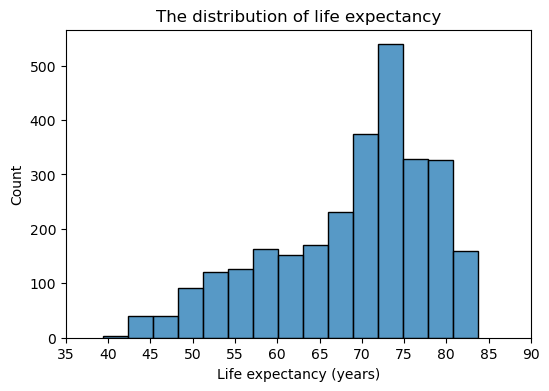

In [12]:
plt.figure(figsize=(6,4))
sns.histplot(Y, bins=15)
plt.xticks(list(range(35,95,5)))
plt.title('The distribution of life expectancy')
plt.xlabel('Life expectancy (years)')
plt.savefig('../Figure/The distribution of life expectancy.png',dpi=300)

In [13]:
X.describe()

Infant Deaths  Under_Five Deaths  Adult Mortality  Alcohol Consumption  \
count    2864.000000        2864.000000      2864.000000          2864.000000   
mean       30.363792          42.938268       192.251775             4.820882   
std        27.538117          44.569974       114.910281             3.981949   
min         1.800000           2.300000        49.384000             0.000000   
25%         8.100000           9.675000       106.910250             1.200000   
50%        19.600000          23.100000       163.841500             4.020000   
75%        47.350000          66.000000       246.791375             7.777500   
max       138.100000         224.900000       719.360500            17.870000   

       Hepatitis B      Measles          BMI        Polio   Diphtheria  \
count  2864.000000  2864.000000  2864.000000  2864.000000  2864.000000   
mean     84.292598    77.344972    25.032926    86.499651    86.271648   
std      15.995511    18.659693     2.193905    15.080365    15.534225   
min      12.000000    10.000000    19.800000     8.000000    16.000000   
25%      78.000000    64.000000    23.200000    81.000000    81.000000   
50%      89.000000    83.000000    25.500000    93.000000    93.000000   
75%      96.000000    93.000000    26.400000    97.000000    97.000000   
max      99.000000    99.000000    32.100000    99.000000    99.000000   

       Incidents of HIV  GDP(per capita)   Population  \
count       2864.000000      2864.000000  2864.000000   
mean           0.894288     11540.924930    36.675915   
std            2.381389     16934.788931   136.485867   
min            0.010000       148.000000     0.080000   
25%            0.080000      1415.750000     2.097500   
50%            0.150000      4217.000000     7.850000   
75%            0.460000     12557.000000    23.687500   
max           21.680000    112418.000000  1379.860000   

       Thinness (ten to nineteen years)  Thinness (five to nine years)  \
count                       2864.000000                    2864.000000   
mean                           4.865852                       4.899825   
std                            4.438234                       4.525217   
min                            0.100000                       0.100000   
25%                            1.600000                       1.600000   
50%                            3.300000                       3.400000   
75%                            7.200000                       7.300000   
max                           27.700000                      28.600000   

         Schooling  
count  2864.000000  
mean      7.632123  
std       3.171556  
min       1.100000  
25%       5.100000  
50%       7.800000  
75%      10.300000  
max      14.100000

   Infant Deaths  Under_Five Deaths  Adult Mortality  Alcohol Consumption  \
0           90.5              129.2         310.8305                 0.02   
1           87.9              125.2         304.8580                 0.02   
2           85.3              121.1         298.8855                 0.02   
3           82.7              116.9         292.0365                 0.02   
4           80.0              112.6         285.1880                 0.02   

   Hepatitis B  Measles   BMI  Polio  Diphtheria  Incidents of HIV  \
0           62       12  21.7     24          24              0.02   
1           63       13  21.8     35          33              0.02   
2           64       14  21.9     36          36              0.02   
3           65       15  22.0     41          41              0.02   
4           67       16  22.1     50          50              0.02   

   GDP(per capita)  Population  Thinness (ten to nineteen years)  \
0              148       20.78                  

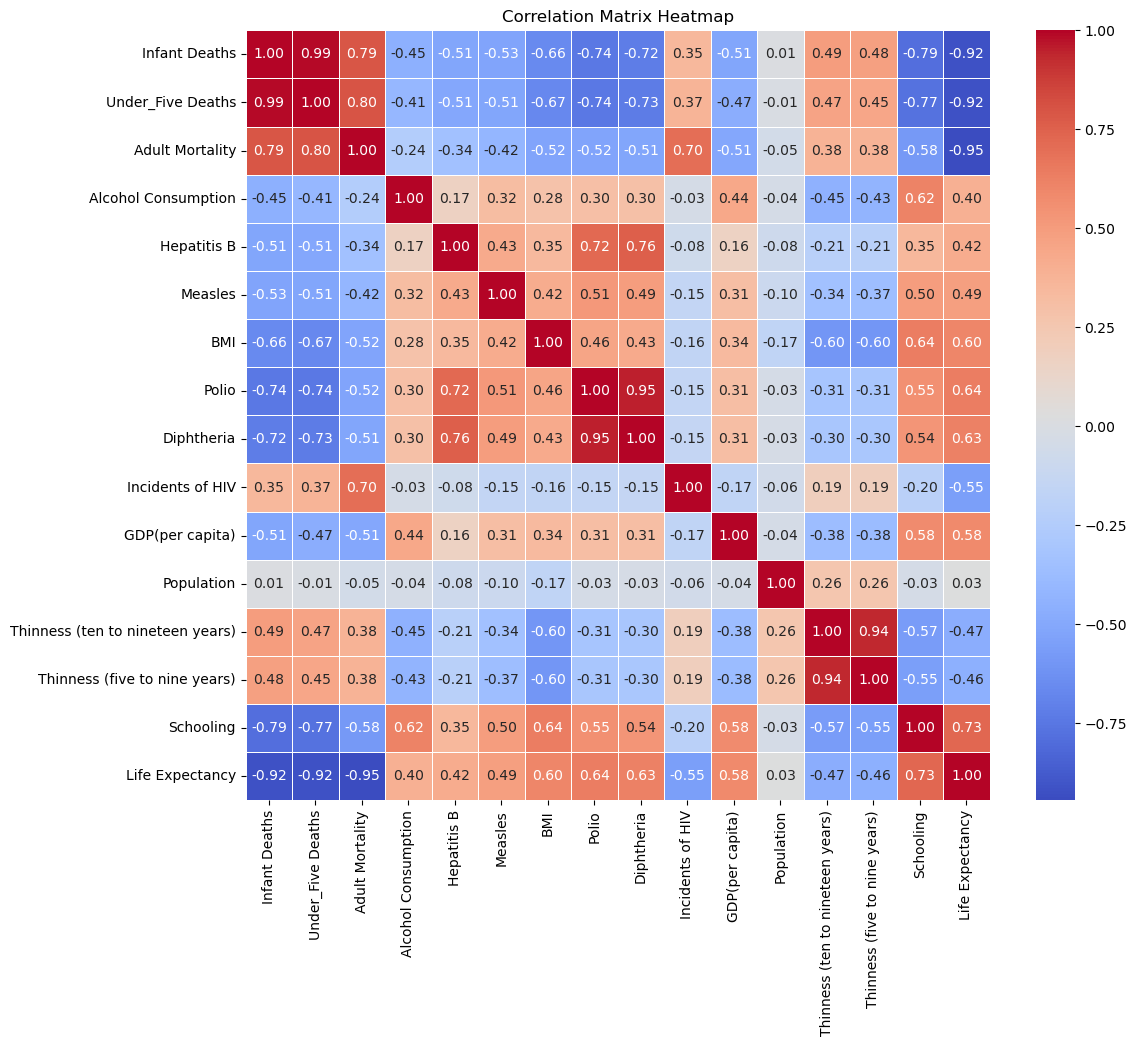

In [14]:
# Calculate the correlation matrix
X1 = X.loc[:,X.columns != 'Country']
X2 = X1.loc[:,X1.columns != 'Region']
X3 = X2.loc[:,X2.columns != 'Economy Status']
Z = pd.concat([X3,Y],axis=1)
print(Z.head())
corr_mat = Z.corr(method='pearson')

# Create a heatmap using seaborn
plt.figure(figsize=(12,10))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.savefig('../Figure/Correlation Matrix Heatmap.png',dpi=600)
plt.show()

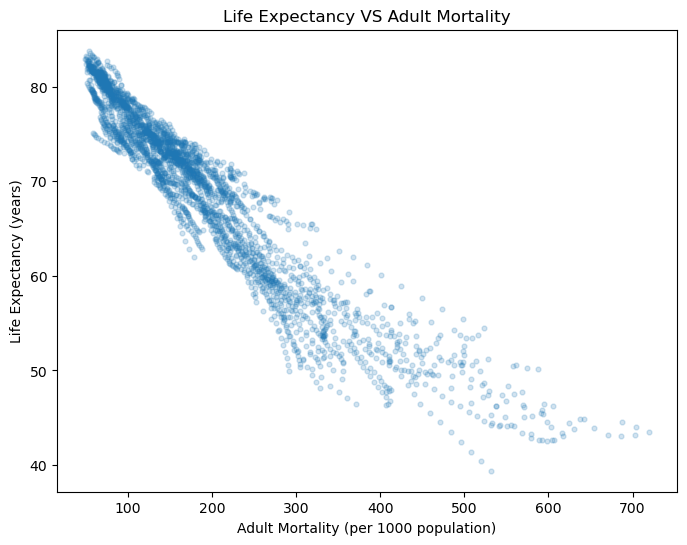

In [15]:
df.plot.scatter('Adult Mortality','Life Expectancy',figsize=(8,6),alpha=0.2,s=12)
plt.xlabel('Adult Mortality (per 1000 population)')
plt.ylabel('Life Expectancy (years)')
plt.title('Life Expectancy VS Adult Mortality')
plt.savefig('../Figure/Life Expectancy VS Adult Mortality(Scatter Plot).png',dpi=600)
plt.show()

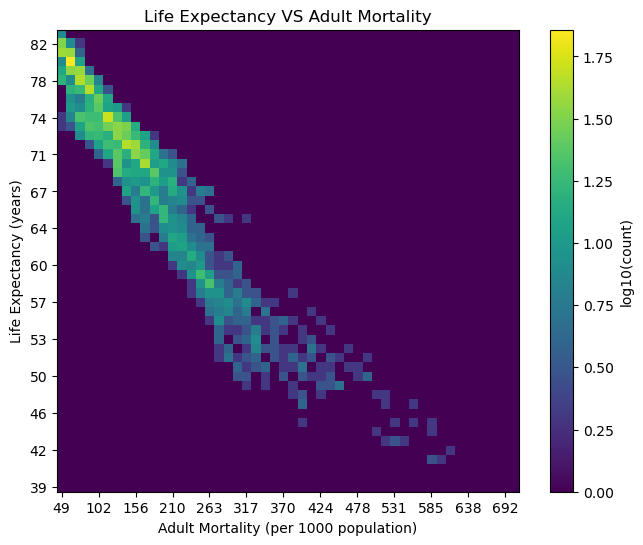

In [16]:
nbins = 50

heatmap, xedges, yedges = np.histogram2d(df['Adult Mortality'], df['Life Expectancy'], bins=nbins)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
heatmap[heatmap == 0] = 0.1 # we will use log and log(0) is undefined

plt.figure(figsize=(8,6))

plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0) # use log count
plt.xlabel('Adult Mortality (per 1000 population)')
plt.ylabel('Life Expectancy (years)')
plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.title('Life Expectancy VS Adult Mortality')
plt.colorbar(label='log10(count)')
plt.savefig('../Figure/Life Expectancy VS Adult Mortality(Heatmap).png',dpi=600)
plt.show()

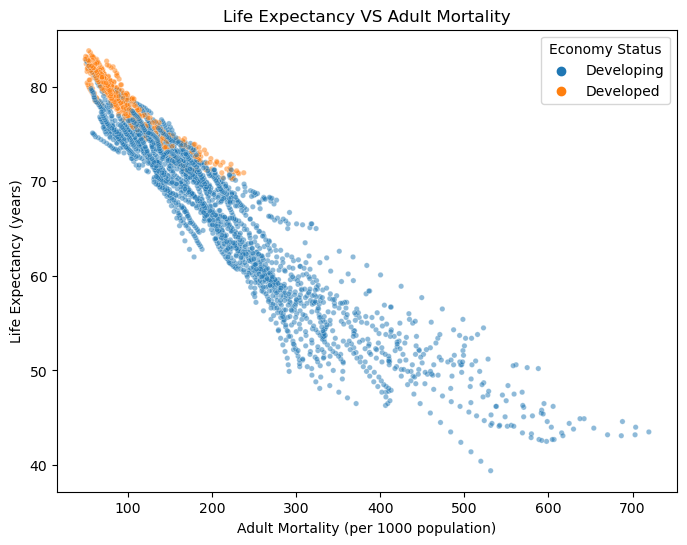

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Adult Mortality'], y=df['Life Expectancy'], 
                hue=df['Economy Status'],s=15,alpha=0.5)
plt.xlabel('Adult Mortality (per 1000 population)')
plt.ylabel('Life Expectancy (years)')
plt.title('Life Expectancy VS Adult Mortality')
plt.savefig('../Figure/Life Expectancy VS Adult Mortality(Scatter Plot,group by Economy Status).png',dpi=600)
plt.show()

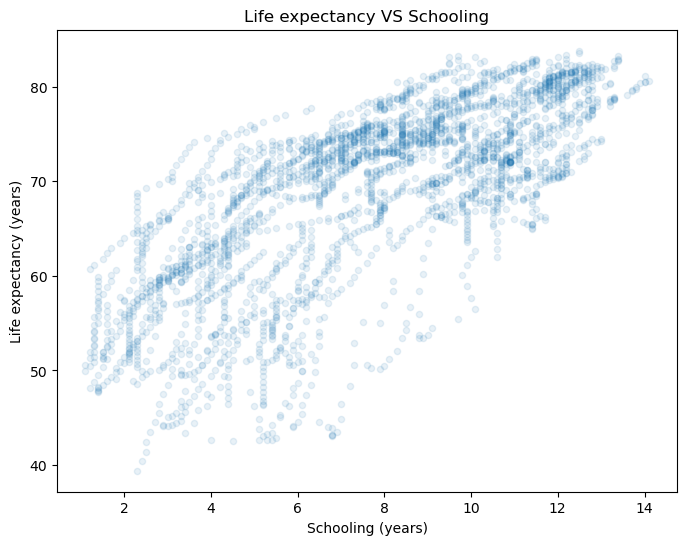

In [18]:
df.plot.scatter('Schooling','Life Expectancy',figsize=(8,6),alpha=0.1,s=20)
plt.xlabel('Schooling (years)')
plt.ylabel('Life expectancy (years)')
plt.title('Life expectancy VS Schooling')
plt.savefig('../Figure/Life Expectancy VS Schooling(Scatter Plot).png',dpi=600)
plt.show()

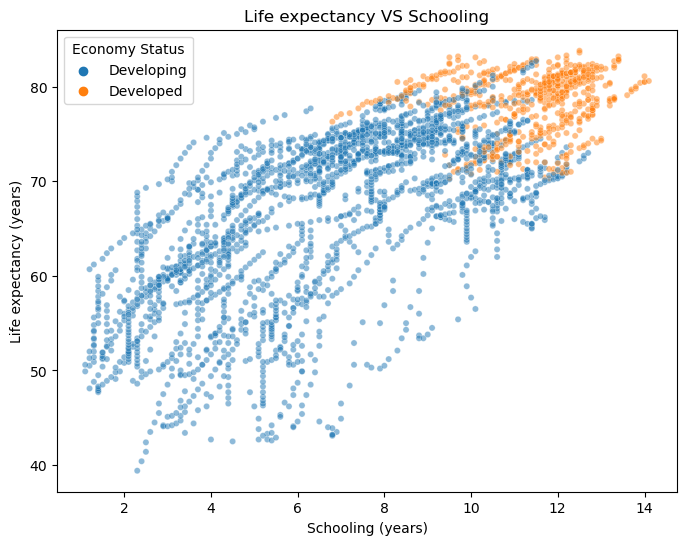

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Schooling'], y=df['Life Expectancy'], 
                hue=df['Economy Status'],s=20,alpha=0.5)
plt.xlabel('Schooling (years)')
plt.ylabel('Life expectancy (years)')
plt.title('Life expectancy VS Schooling')
plt.savefig('../Figure/Life Expectancy VS Schooling(Scatter Plot,group by Economy Status).png',dpi=600)
plt.show()

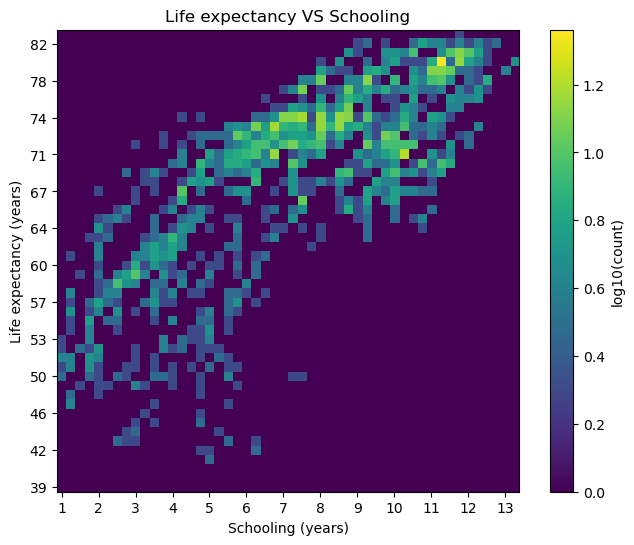

In [20]:
nbins = 50

heatmap, xedges, yedges = np.histogram2d(df['Schooling'], df['Life Expectancy'], bins=nbins)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
heatmap[heatmap == 0] = 0.1 # we will use log and log(0) is undefined

plt.figure(figsize=(8,6))

plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0) # use log count
plt.xlabel('Schooling (years)')
plt.ylabel('Life expectancy (years)')
plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.title('Life expectancy VS Schooling')
plt.colorbar(label='log10(count)')
plt.savefig('../Figure/Life Expectancy VS Schooling(Heatmap).png',dpi=600)
plt.show()

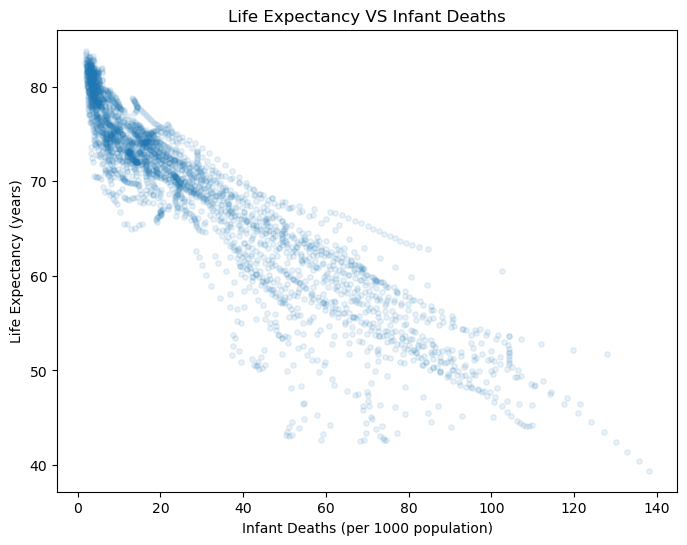

In [21]:
df.plot.scatter('Infant Deaths','Life Expectancy',figsize=(8,6),alpha=0.1,s=15)
plt.xlabel('Infant Deaths (per 1000 population)')
plt.ylabel('Life Expectancy (years)')
plt.title('Life Expectancy VS Infant Deaths')
plt.savefig('../Figure/Life Expectancy VS Infant Deaths(Scatter Plot).png',dpi=600)
plt.show()

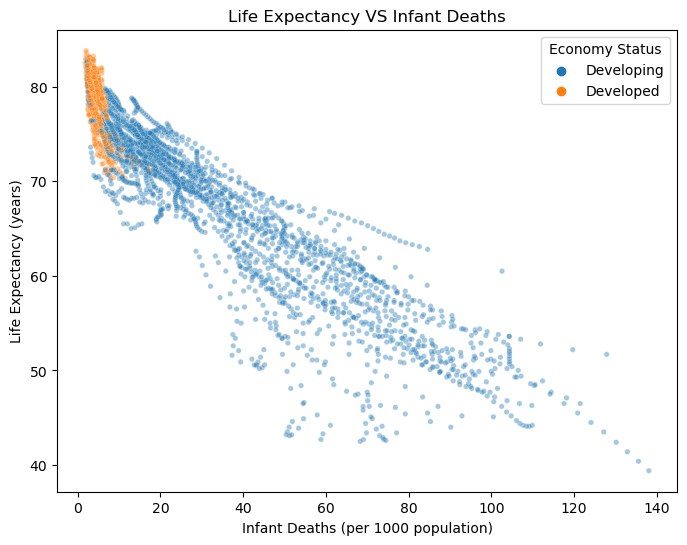

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Infant Deaths'], y=df['Life Expectancy'], 
                hue=df['Economy Status'],s=15,alpha=0.4)
plt.xlabel('Infant Deaths (per 1000 population)')
plt.ylabel('Life Expectancy (years)')
plt.title('Life Expectancy VS Infant Deaths')
plt.savefig('../Figure/Life Expectancy VS Infant Deaths(Scatter Plot,group by Economy Status).png',dpi=600)
plt.show()

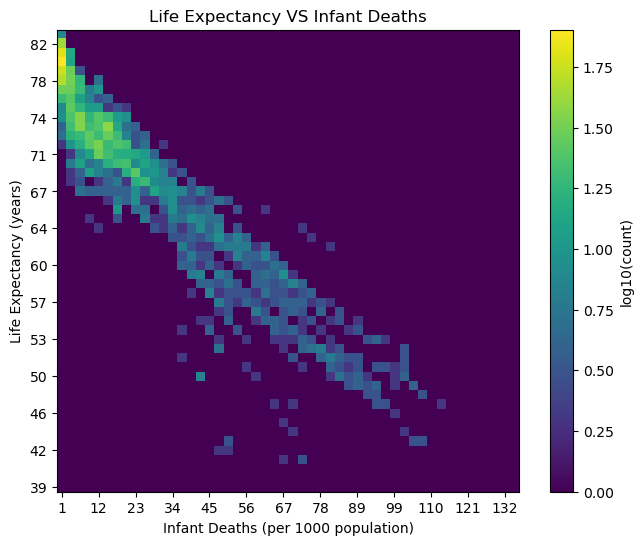

In [23]:
nbins = 50

heatmap, xedges, yedges = np.histogram2d(df['Infant Deaths'], df['Life Expectancy'], bins=nbins)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
heatmap[heatmap == 0] = 0.1 # we will use log and log(0) is undefined

plt.figure(figsize=(8,6))
plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0) # use log count
plt.xlabel('Infant Deaths (per 1000 population)')
plt.ylabel('Life Expectancy (years)')
plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.title('Life Expectancy VS Infant Deaths')
plt.colorbar(label='log10(count)')
plt.savefig('../Figure/Life Expectancy VS Infant Deaths(Heatmap).png',dpi=600)
plt.show()

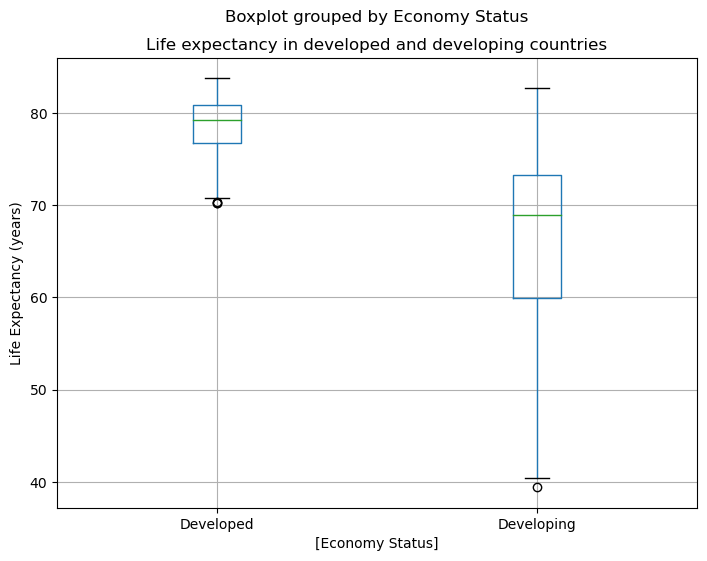

In [24]:
df[['Life Expectancy','Economy Status']].boxplot(by='Economy Status',figsize=(8,6))
plt.ylabel('Life Expectancy (years)')
plt.title('Life expectancy in developed and developing countries')
plt.savefig('../Figure/Life expectancy in developed and developing countries(boxplot).png',dpi=600)
plt.show()

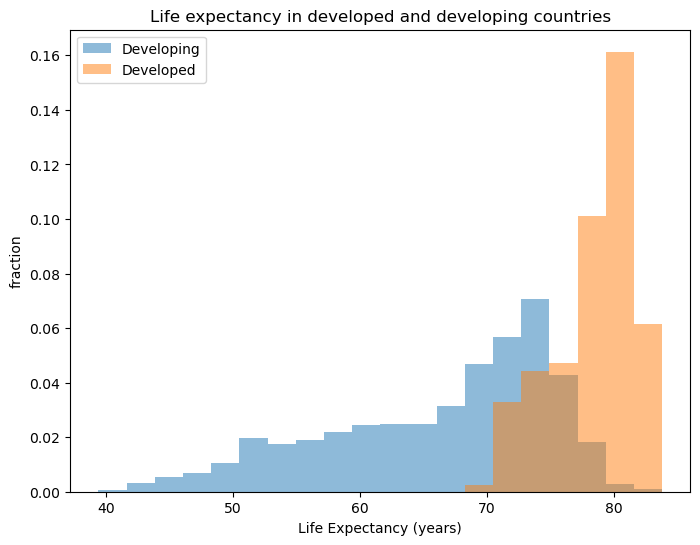

In [25]:
categories = df['Economy Status'].unique()
bin_range = (df['Life Expectancy'].min(),df['Life Expectancy'].max())

plt.figure(figsize=(8,6))

for c in categories:
    plt.hist(df[df['Economy Status']==c]['Life Expectancy'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('Life Expectancy (years)')
plt.title('Life expectancy in developed and developing countries')
plt.savefig('../Figure/Life expectancy in developed and developing countries(barplot).png',dpi=600)
plt.show()

In [26]:
df['Region'].value_counts()

Region
Africa                           816
Asia                             432
European Union                   432
Central America and Caribbean    304
Rest of Europe                   240
Middle East                      224
South America                    192
Oceania                          176
North America                     48
Name: count, dtype: int64

In [27]:
pd.pivot_table(data=df[['Life Expectancy','Region']], index=['Region'], aggfunc='mean')

Life Expectancy
Region                                        
Africa                               57.847304
Asia                                 69.454861
Central America and Caribbean        72.437500
European Union                       77.715046
Middle East                          73.975446
North America                        77.841667
Oceania                              69.517614
Rest of Europe                       74.525417
South America                        72.780729

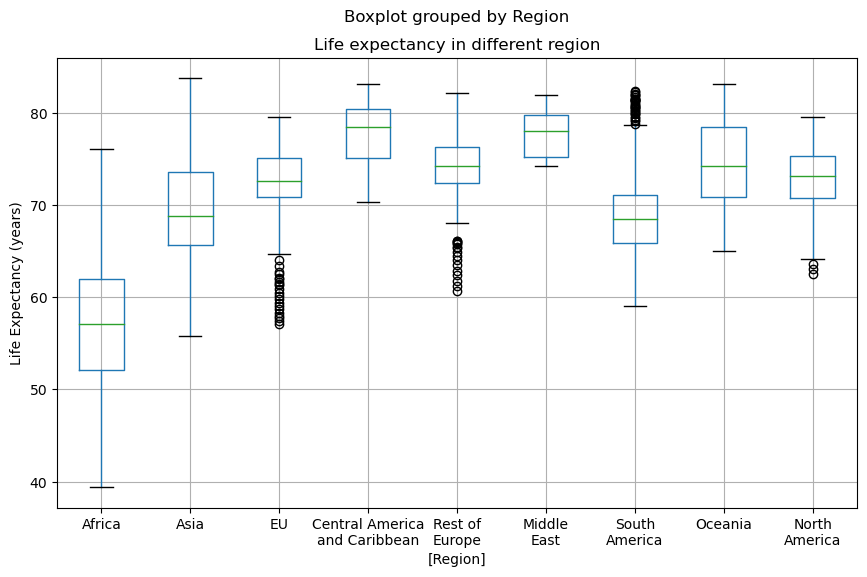

In [28]:
df[['Life Expectancy','Region']].boxplot(by='Region',figsize=(10,6))
plt.ylabel('Life Expectancy (years)')
plt.xticks([1,2,3,4,5,6,7,8,9],['Africa','Asia','EU','Central America\nand Caribbean','Rest of\nEurope','Middle\nEast','South\nAmerica','Oceania','North\nAmerica'])
plt.title('Life expectancy in different region')
plt.savefig('../Figure/Life expectancy in different region(boxplot).png',dpi=600)
plt.show()

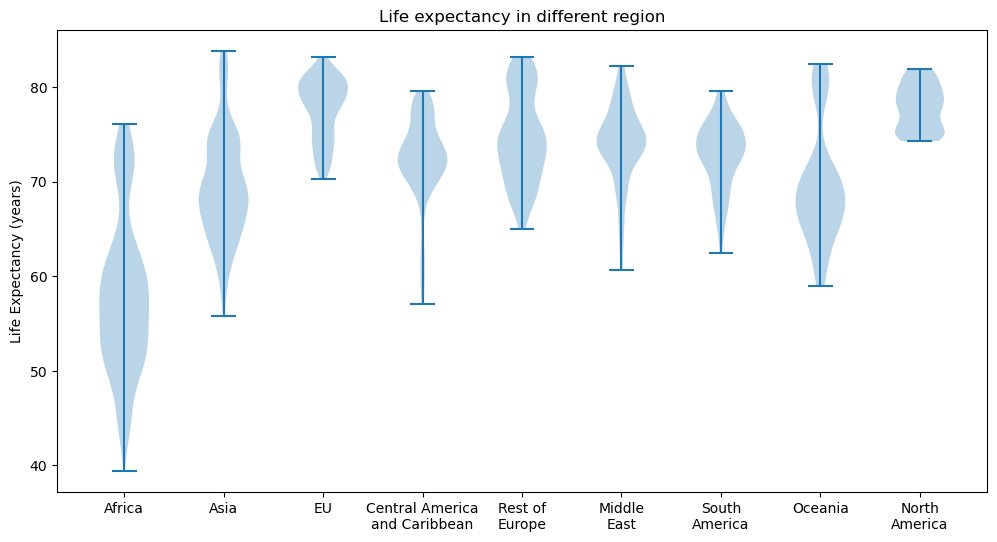

In [29]:
dataset = [df[df['Region']=='Africa']['Life Expectancy'].values,
           df[df['Region']=='Asia']['Life Expectancy'].values,
           df[df['Region']=='European Union']['Life Expectancy'].values,
           df[df['Region']=='Central America and Caribbean']['Life Expectancy'].values,
           df[df['Region']=='Rest of Europe']['Life Expectancy'].values,
           df[df['Region']=='Middle East']['Life Expectancy'].values,
           df[df['Region']=='South America']['Life Expectancy'].values,
           df[df['Region']=='Oceania']['Life Expectancy'].values,
           df[df['Region']=='North America']['Life Expectancy'].values]

plt.figure(figsize=(12,6))

plt.violinplot(dataset = dataset)
plt.xticks([1,2,3,4,5,6,7,8,9],['Africa','Asia','EU','Central America\nand Caribbean','Rest of\nEurope','Middle\nEast','South\nAmerica','Oceania','North\nAmerica'])
plt.ylabel('Life Expectancy (years)')
plt.title('Life expectancy in different region')
plt.savefig('../Figure/Life expectancy in different region(violinplot).png',dpi=600)
plt.show()

In [30]:
# Find the country that has highest GDP per capita in each region
print(df[df['Region'] == 'Africa'].iloc[df[df['Region'] == 'Africa']['GDP(per capita)'].argmax()]['Country'])
print(df[df['Region'] == 'Asia'].iloc[df[df['Region'] == 'Asia']['GDP(per capita)'].argmax()]['Country'])
print(df[df['Region'] == 'Central America and Caribbean'].iloc[df[df['Region'] == 'Central America and Caribbean']['GDP(per capita)'].argmax()]['Country'])
print(df[df['Region'] == 'European Union'].iloc[df[df['Region'] == 'European Union']['GDP(per capita)'].argmax()]['Country'])
print(df[df['Region'] == 'Middle East'].iloc[df[df['Region'] == 'Middle East']['GDP(per capita)'].argmax()]['Country'])
print(df[df['Region'] == 'North America'].iloc[df[df['Region'] == 'North America']['GDP(per capita)'].argmax()]['Country'])
print(df[df['Region'] == 'Oceania'].iloc[df[df['Region'] == 'Oceania']['GDP(per capita)'].argmax()]['Country'])
print(df[df['Region'] == 'Rest of Europe'].iloc[df[df['Region'] == 'Rest of Europe']['GDP(per capita)'].argmax()]['Country'])
print(df[df['Region'] == 'South America'].iloc[df[df['Region'] == 'South America']['GDP(per capita)'].argmax()]['Country'])

Equatorial Guinea
Singapore
Bahamas, The
Luxembourg
Qatar
United States
Australia
Switzerland
Venezuela, RB


In [31]:
# Find the country that has most population in each region
print(df[df['Region'] == 'Africa'].iloc[df[df['Region'] == 'Africa']['Population'].argmax()]['Country'])
print(df[df['Region'] == 'Asia'].iloc[df[df['Region'] == 'Asia']['Population'].argmax()]['Country'])
print(df[df['Region'] == 'Central America and Caribbean'].iloc[df[df['Region'] == 'Central America and Caribbean']['Population'].argmax()]['Country'])
print(df[df['Region'] == 'European Union'].iloc[df[df['Region'] == 'European Union']['Population'].argmax()]['Country'])
print(df[df['Region'] == 'Middle East'].iloc[df[df['Region'] == 'Middle East']['Population'].argmax()]['Country'])
print(df[df['Region'] == 'North America'].iloc[df[df['Region'] == 'North America']['Population'].argmax()]['Country'])
print(df[df['Region'] == 'Oceania'].iloc[df[df['Region'] == 'Oceania']['Population'].argmax()]['Country'])
print(df[df['Region'] == 'Rest of Europe'].iloc[df[df['Region'] == 'Rest of Europe']['Population'].argmax()]['Country'])
print(df[df['Region'] == 'South America'].iloc[df[df['Region'] == 'South America']['Population'].argmax()]['Country'])

Nigeria
China
Guatemala
Germany
Turkiye
United States
Australia
Russian Federation
Brazil


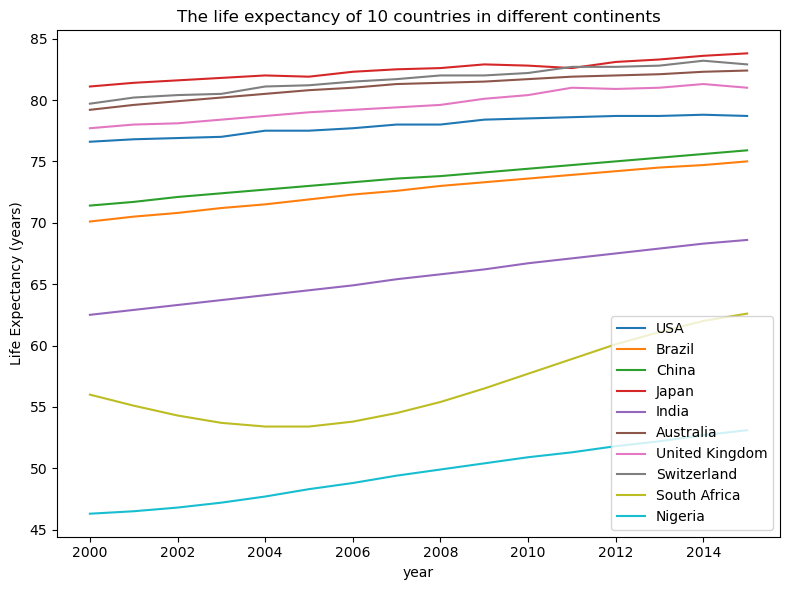

In [32]:
time = np.arange(2000,2016)
plt.figure(figsize=(8,6))
plt.plot(time,df[df['Country'] == 'United States']['Life Expectancy'])
plt.plot(time,df[df['Country'] == 'Brazil']['Life Expectancy'])
plt.plot(time,df[df['Country'] == 'China']['Life Expectancy'])
plt.plot(time,df[df['Country'] == 'Japan']['Life Expectancy'])
plt.plot(time,df[df['Country'] == 'India']['Life Expectancy'])
plt.plot(time,df[df['Country'] == 'Australia']['Life Expectancy'])
plt.plot(time,df[df['Country'] == 'United Kingdom']['Life Expectancy'])
plt.plot(time,df[df['Country'] == 'Switzerland']['Life Expectancy'])
plt.plot(time,df[df['Country'] == 'South Africa']['Life Expectancy'])
plt.plot(time,df[df['Country'] == 'Nigeria']['Life Expectancy'])
plt.xlabel('year')
plt.ylabel('Life Expectancy (years)')
plt.title('The life expectancy of 10 countries in different continents')
plt.legend(['USA','Brazil','China','Japan','India','Australia','United Kingdom','Switzerland','South Africa','Nigeria'])
plt.tight_layout()
plt.savefig('../Figure/The life expectancy of 10 countries in different continents.png',dpi=600)
plt.show()

/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


[0.9375     0.87459063 0.81167105 0.74878851 0.68586605 0.62294099
 0.56010887 0.49888154 0.43708634 0.37457001 0.31207045 0.24956859
 0.18686548 0.125             nan        nan]
[0.9375     0.85746013 0.79282623 0.7290942  0.65416649 0.60123913
 0.52950556 0.45383213 0.38833586 0.33482964 0.28944595 0.23904572
 0.14173668 0.125             nan        nan]
[0.9375     0.87448936 0.81191792 0.74913811 0.68607486 0.62386341
 0.56094792 0.49901737 0.43619941 0.37378304 0.31196022 0.24808265
 0.18739996 0.125             nan        nan]
[0.9375     0.86540596 0.79511052 0.72422739 0.66925235 0.61165081
 0.553173   0.4785434  0.40491851 0.33146888 0.28156451 0.18333333
 0.15865385 0.125             nan        nan]
[0.9375     0.87322135 0.80964826 0.74717729 0.6839668  0.61965904
 0.55856075 0.4959588  0.43332099 0.37293683 0.31013514 0.24271849
 0.18058559 0.125             nan        nan]
[ 0.9375      0.85160216  0.72610187  0.56736878  0.3711328   0.12669983
 -0.13888761 -0.3252244  -0

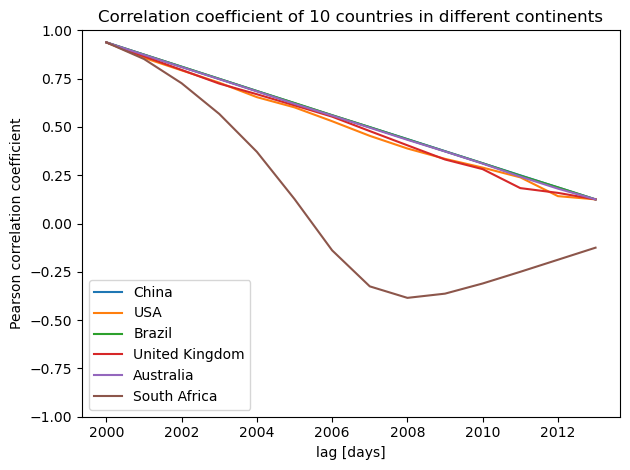

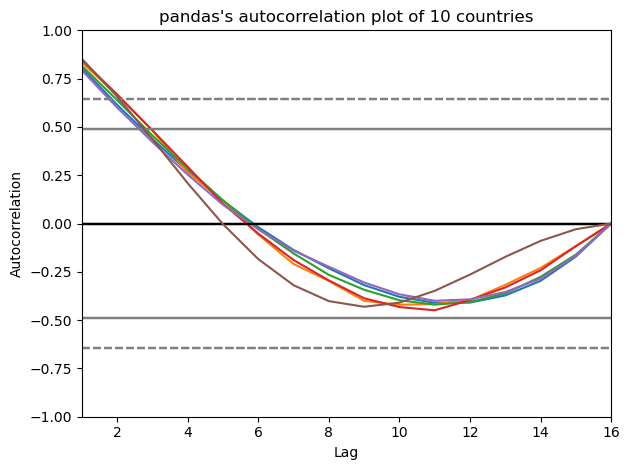

In [33]:
# let's create an autocorrelation plot

lags = np.arange(2000,2016)

df_China = df[df['Country'] == 'China']
corr_coefs_China = np.zeros(len(lags))
for i in np.arange(len(lags)):
    x = df_China['Life Expectancy'].iloc[i:-1].reset_index(drop=True) # recent observations
    y = df_China['Life Expectancy'].iloc[:-i-1].reset_index(drop=True) # lag-shifted observations
    # the shapes must be the same
    if x.shape != y.shape:
        raise ValueError('shape mismatch!')
    # Pearson correlation multiplied by the fraction of time series used
    corr_coefs_China[i] = x.corr(y,method='pearson')*x.shape[0]/df_China['Life Expectancy'].shape[0]
print(corr_coefs_China)

df_USA = df[df['Country'] == 'United States']
corr_coefs_USA = np.zeros(len(lags))
for i in np.arange(len(lags)):
    x = df_USA['Life Expectancy'].iloc[i:-1].reset_index(drop=True) # recent observations
    y = df_USA['Life Expectancy'].iloc[:-i-1].reset_index(drop=True) # lag-shifted observations
    # the shapes must be the same
    if x.shape != y.shape:
        raise ValueError('shape mismatch!')
    # Pearson correlation multiplied by the fraction of time series used
    corr_coefs_USA[i] = x.corr(y,method='pearson')*x.shape[0]/df_USA['Life Expectancy'].shape[0]
print(corr_coefs_USA)

df_Brazil = df[df['Country'] == 'Brazil']
corr_coefs_Brazil = np.zeros(len(lags))
for i in np.arange(len(lags)):
    x = df_Brazil['Life Expectancy'].iloc[i:-1].reset_index(drop=True) # recent observations
    y = df_Brazil['Life Expectancy'].iloc[:-i-1].reset_index(drop=True) # lag-shifted observations
    # the shapes must be the same
    if x.shape != y.shape:
        raise ValueError('shape mismatch!')
    # Pearson correlation multiplied by the fraction of time series used
    corr_coefs_Brazil[i] = x.corr(y,method='pearson')*x.shape[0]/df_Brazil['Life Expectancy'].shape[0]
print(corr_coefs_Brazil)

df_United_Kingdom = df[df['Country'] == 'United Kingdom']
corr_coefs_United_Kingdom = np.zeros(len(lags))
for i in np.arange(len(lags)):
    x = df_United_Kingdom['Life Expectancy'].iloc[i:-1].reset_index(drop=True) # recent observations
    y = df_United_Kingdom['Life Expectancy'].iloc[:-i-1].reset_index(drop=True) # lag-shifted observations
    # the shapes must be the same
    if x.shape != y.shape:
        raise ValueError('shape mismatch!')
    # Pearson correlation multiplied by the fraction of time series used
    corr_coefs_United_Kingdom[i] = x.corr(y,method='pearson')*x.shape[0]/df_United_Kingdom['Life Expectancy'].shape[0]
print(corr_coefs_United_Kingdom)

df_Australia = df[df['Country'] == 'Australia']
corr_coefs_Australia = np.zeros(len(lags))
for i in np.arange(len(lags)):
    x = df_Australia['Life Expectancy'].iloc[i:-1].reset_index(drop=True) # recent observations
    y = df_Australia['Life Expectancy'].iloc[:-i-1].reset_index(drop=True) # lag-shifted observations
    # the shapes must be the same
    if x.shape != y.shape:
        raise ValueError('shape mismatch!')
    # Pearson correlation multiplied by the fraction of time series used
    corr_coefs_Australia[i] = x.corr(y,method='pearson')*x.shape[0]/df_Australia['Life Expectancy'].shape[0]
print(corr_coefs_Australia)

df_South_Africa = df[df['Country'] == 'South Africa']
corr_coefs_South_Africa = np.zeros(len(lags))
for i in np.arange(len(lags)):
    x = df_South_Africa['Life Expectancy'].iloc[i:-1].reset_index(drop=True) # recent observations
    y = df_South_Africa['Life Expectancy'].iloc[:-i-1].reset_index(drop=True) # lag-shifted observations
    # the shapes must be the same
    if x.shape != y.shape:
        raise ValueError('shape mismatch!')
    # Pearson correlation multiplied by the fraction of time series used
    corr_coefs_South_Africa[i] = x.corr(y,method='pearson')*x.shape[0]/df_South_Africa['Life Expectancy'].shape[0]
print(corr_coefs_South_Africa)


plt.plot(lags,corr_coefs_China)
plt.plot(lags,corr_coefs_USA)
plt.plot(lags,corr_coefs_Brazil)
plt.plot(lags,corr_coefs_United_Kingdom)
plt.plot(lags,corr_coefs_Australia)
plt.plot(lags,corr_coefs_South_Africa)
plt.ylim([-1,1])
plt.xlabel('lag [days]')
plt.ylabel('Pearson correlation coefficient')
plt.legend(['China','USA','Brazil','United Kingdom','Australia','South Africa'])
plt.title('Correlation coefficient of 10 countries in different continents')
plt.tight_layout()
plt.savefig('../Figure/Correlation coefficient of 10 countries in different continents.png',dpi=600)
plt.show()

# a one-liner
pd.plotting.autocorrelation_plot(df_China['Life Expectancy'])
pd.plotting.autocorrelation_plot(df_USA['Life Expectancy'])
pd.plotting.autocorrelation_plot(df_Brazil['Life Expectancy'])
pd.plotting.autocorrelation_plot(df_United_Kingdom['Life Expectancy'])
pd.plotting.autocorrelation_plot(df_Australia['Life Expectancy'])
pd.plotting.autocorrelation_plot(df_South_Africa['Life Expectancy'])
plt.title("pandas's autocorrelation plot of 10 countries")
# plt.legend(['China','USA','Brazil','United Kingdom','Australia','South Africa'])
plt.savefig('../Figure/pandas autocorrelation plot of 10 countries.png',dpi=600)
plt.tight_layout()
plt.show()

### 3. Feature Engineering: lag features and target variable

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
df.head()

Country Region  Year  Infant Deaths  Under_Five Deaths  \
0  Afghanistan   Asia  2000           90.5              129.2   
1  Afghanistan   Asia  2001           87.9              125.2   
2  Afghanistan   Asia  2002           85.3              121.1   
3  Afghanistan   Asia  2003           82.7              116.9   
4  Afghanistan   Asia  2004           80.0              112.6   

   Adult Mortality  Alcohol Consumption  Hepatitis B  Measles   BMI  Polio  \
0         310.8305                 0.02           62       12  21.7     24   
1         304.8580                 0.02           63       13  21.8     35   
2         298.8855                 0.02           64       14  21.9     36   
3         292.0365                 0.02           65       15  22.0     41   
4         285.1880                 0.02           67       16  22.1     50   

   Diphtheria  Incidents of HIV  GDP(per capita)  Population  \
0          24              0.02              148       20.78   
1          33              0.02              163       21.61   
2          36              0.02              320       22.60   
3          41              0.02              332       23.68   
4          50              0.02              323       24.73   

   Thinness (ten to nineteen years)  Thinness (five to nine years)  Schooling  \
0                               2.3                            2.5        2.2   
1                               2.1                            2.4        2.2   
2                              19.9                            2.2        2.3   
3                              19.7                           19.9        2.4   
4                              19.5                           19.7        2.5   

   Life Expectancy Economy Status  
0             55.8     Developing  
1             56.3     Developing  
2             56.8     Developing  
3             57.3     Developing  
4             57.8     Developing

#### (1) Lag 1 year

In [11]:
print('The original shape of dataframe is:',df.shape)

countries = df['Country'].unique()
feature_names = df.columns
lag_features = feature_names[3:19]
lag_length = 1
df_lag_1 = pd.DataFrame()
for c in countries:
    df_temp = df.loc[df['Country']==c,:]
    for i in range(1,lag_length+1):
        for j in range(len(lag_features)):
            lag_data = df_temp[lag_features[j]].shift(i)
            name = lag_features[j]+'_lag'+str(i)
            df_temp[name] = lag_data # append the lag data to the original dataframe
    df_lag_1 = pd.concat([df_lag_1,df_temp],axis=0)
print('The shape of dataframe after being lagged is:',df_lag_1.shape)

df_lag_1.head()

The original shape of dataframe is: (2864, 20)


The shape of dataframe after being lagged is: (2864, 36)


Country Region  Year  Infant Deaths  Under_Five Deaths  \
0  Afghanistan   Asia  2000           90.5              129.2   
1  Afghanistan   Asia  2001           87.9              125.2   
2  Afghanistan   Asia  2002           85.3              121.1   
3  Afghanistan   Asia  2003           82.7              116.9   
4  Afghanistan   Asia  2004           80.0              112.6   

   Adult Mortality  Alcohol Consumption  Hepatitis B  Measles   BMI  ...  \
0         310.8305                 0.02           62       12  21.7  ...   
1         304.8580                 0.02           63       13  21.8  ...   
2         298.8855                 0.02           64       14  21.9  ...   
3         292.0365                 0.02           65       15  22.0  ...   
4         285.1880                 0.02           67       16  22.1  ...   

   BMI_lag1  Polio_lag1  Diphtheria_lag1  Incidents of HIV_lag1  \
0       NaN         NaN              NaN                    NaN   
1      21.7        24.0             24.0                   0.02   
2      21.8        35.0             33.0                   0.02   
3      21.9        36.0             36.0                   0.02   
4      22.0        41.0             41.0                   0.02   

   GDP(per capita)_lag1  Population_lag1  \
0                   NaN              NaN   
1                 148.0            20.78   
2                 163.0            21.61   
3                 320.0            22.60   
4                 332.0            23.68   

   Thinness (ten to nineteen years)_lag1  Thinness (five to nine years)_lag1  \
0                                    NaN                                 NaN   
1                                    2.3                                 2.5   
2                                    2.1                                 2.4   
3                                   19.9                                 2.2   
4                                   19.7                                19.9   

   Schooling_lag1 Life Expectancy_lag1  
0             NaN                  NaN  
1             2.2                 55.8  
2             2.2                 56.3  
3             2.3                 56.8  
4             2.4                 57.3  

[5 rows x 36 columns]

In [12]:
df_lag_1.to_csv('../Data/df_lag_1.csv',sep=',')

#### (2) Lag 2 years

In [13]:
print('The original shape of dataframe is:',df.shape)

countries = df['Country'].unique()
feature_names = df.columns
lag_features = feature_names[3:19]
lag_length = 2
df_lag_2 = pd.DataFrame()
for c in countries:
    df_temp = df.loc[df['Country']==c,:]
    for i in range(1,lag_length+1):
        for j in range(len(lag_features)):
            lag_data = df_temp[lag_features[j]].shift(i)
            name = lag_features[j]+'_lag'+str(i)
            df_temp[name] = lag_data # append the lag data to the original dataframe
    df_lag_2 = pd.concat([df_lag_2,df_temp],axis=0)
print('The shape of dataframe after being lagged is:',df_lag_2.shape)

df_lag_2.head()

The original shape of dataframe is: (2864, 20)
The shape of dataframe after being lagged is: (2864, 52)


Country Region  Year  Infant Deaths  Under_Five Deaths  \
0  Afghanistan   Asia  2000           90.5              129.2   
1  Afghanistan   Asia  2001           87.9              125.2   
2  Afghanistan   Asia  2002           85.3              121.1   
3  Afghanistan   Asia  2003           82.7              116.9   
4  Afghanistan   Asia  2004           80.0              112.6   

   Adult Mortality  Alcohol Consumption  Hepatitis B  Measles   BMI  ...  \
0         310.8305                 0.02           62       12  21.7  ...   
1         304.8580                 0.02           63       13  21.8  ...   
2         298.8855                 0.02           64       14  21.9  ...   
3         292.0365                 0.02           65       15  22.0  ...   
4         285.1880                 0.02           67       16  22.1  ...   

   BMI_lag2  Polio_lag2  Diphtheria_lag2  Incidents of HIV_lag2  \
0       NaN         NaN              NaN                    NaN   
1       NaN         NaN              NaN                    NaN   
2      21.7        24.0             24.0                   0.02   
3      21.8        35.0             33.0                   0.02   
4      21.9        36.0             36.0                   0.02   

   GDP(per capita)_lag2  Population_lag2  \
0                   NaN              NaN   
1                   NaN              NaN   
2                 148.0            20.78   
3                 163.0            21.61   
4                 320.0            22.60   

   Thinness (ten to nineteen years)_lag2  Thinness (five to nine years)_lag2  \
0                                    NaN                                 NaN   
1                                    NaN                                 NaN   
2                                    2.3                                 2.5   
3                                    2.1                                 2.4   
4                                   19.9                                 2.2   

   Schooling_lag2 Life Expectancy_lag2  
0             NaN                  NaN  
1             NaN                  NaN  
2             2.2                 55.8  
3             2.2                 56.3  
4             2.3                 56.8  

[5 rows x 52 columns]

In [14]:
df_lag_2.to_csv('../Data/df_lag_2.csv',sep=',')

#### (3) Lag 3 years

In [15]:
print('The original shape of dataframe is:',df.shape)

countries = df['Country'].unique()
feature_names = df.columns
lag_features = feature_names[3:19]
lag_length = 3
df_lag_3 = pd.DataFrame()
for c in countries:
    df_temp = df.loc[df['Country']==c,:]
    for i in range(1,lag_length+1):
        for j in range(len(lag_features)):
            lag_data = df_temp[lag_features[j]].shift(i)
            name = lag_features[j]+'_lag'+str(i)
            df_temp[name] = lag_data # append the lag data to the original dataframe
    df_lag_3 = pd.concat([df_lag_3,df_temp],axis=0)
print('The shape of dataframe after being lagged is:',df_lag_3.shape)

df_lag_3.head()

The original shape of dataframe is: (2864, 20)
The shape of dataframe after being lagged is: (2864, 68)


Country Region  Year  Infant Deaths  Under_Five Deaths  \
0  Afghanistan   Asia  2000           90.5              129.2   
1  Afghanistan   Asia  2001           87.9              125.2   
2  Afghanistan   Asia  2002           85.3              121.1   
3  Afghanistan   Asia  2003           82.7              116.9   
4  Afghanistan   Asia  2004           80.0              112.6   

   Adult Mortality  Alcohol Consumption  Hepatitis B  Measles   BMI  ...  \
0         310.8305                 0.02           62       12  21.7  ...   
1         304.8580                 0.02           63       13  21.8  ...   
2         298.8855                 0.02           64       14  21.9  ...   
3         292.0365                 0.02           65       15  22.0  ...   
4         285.1880                 0.02           67       16  22.1  ...   

   BMI_lag3  Polio_lag3  Diphtheria_lag3  Incidents of HIV_lag3  \
0       NaN         NaN              NaN                    NaN   
1       NaN         NaN              NaN                    NaN   
2       NaN         NaN              NaN                    NaN   
3      21.7        24.0             24.0                   0.02   
4      21.8        35.0             33.0                   0.02   

   GDP(per capita)_lag3  Population_lag3  \
0                   NaN              NaN   
1                   NaN              NaN   
2                   NaN              NaN   
3                 148.0            20.78   
4                 163.0            21.61   

   Thinness (ten to nineteen years)_lag3  Thinness (five to nine years)_lag3  \
0                                    NaN                                 NaN   
1                                    NaN                                 NaN   
2                                    NaN                                 NaN   
3                                    2.3                                 2.5   
4                                    2.1                                 2.4   

   Schooling_lag3 Life Expectancy_lag3  
0             NaN                  NaN  
1             NaN                  NaN  
2             NaN                  NaN  
3             2.2                 55.8  
4             2.2                 56.3  

[5 rows x 68 columns]

In [16]:
df_lag_3.to_csv('../Data/df_lag_3.csv',sep=',')

#### (4) Lag 4 years

In [17]:
print('The original shape of dataframe is:',df.shape)

countries = df['Country'].unique()
feature_names = df.columns
lag_features = feature_names[3:19]
lag_length = 4
df_lag_4 = pd.DataFrame()
for c in countries:
    df_temp = df.loc[df['Country']==c,:]
    for i in range(1,lag_length+1):
        for j in range(len(lag_features)):
            lag_data = df_temp[lag_features[j]].shift(i)
            name = lag_features[j]+'_lag'+str(i)
            df_temp[name] = lag_data # append the lag data to the original dataframe
    df_lag_4 = pd.concat([df_lag_4,df_temp],axis=0)
print('The shape of dataframe after being lagged is:',df_lag_4.shape)

df_lag_4.head()

The original shape of dataframe is: (2864, 20)
The shape of dataframe after being lagged is: (2864, 84)


Country Region  Year  Infant Deaths  Under_Five Deaths  \
0  Afghanistan   Asia  2000           90.5              129.2   
1  Afghanistan   Asia  2001           87.9              125.2   
2  Afghanistan   Asia  2002           85.3              121.1   
3  Afghanistan   Asia  2003           82.7              116.9   
4  Afghanistan   Asia  2004           80.0              112.6   

   Adult Mortality  Alcohol Consumption  Hepatitis B  Measles   BMI  ...  \
0         310.8305                 0.02           62       12  21.7  ...   
1         304.8580                 0.02           63       13  21.8  ...   
2         298.8855                 0.02           64       14  21.9  ...   
3         292.0365                 0.02           65       15  22.0  ...   
4         285.1880                 0.02           67       16  22.1  ...   

   BMI_lag4  Polio_lag4  Diphtheria_lag4  Incidents of HIV_lag4  \
0       NaN         NaN              NaN                    NaN   
1       NaN         NaN              NaN                    NaN   
2       NaN         NaN              NaN                    NaN   
3       NaN         NaN              NaN                    NaN   
4      21.7        24.0             24.0                   0.02   

   GDP(per capita)_lag4  Population_lag4  \
0                   NaN              NaN   
1                   NaN              NaN   
2                   NaN              NaN   
3                   NaN              NaN   
4                 148.0            20.78   

   Thinness (ten to nineteen years)_lag4  Thinness (five to nine years)_lag4  \
0                                    NaN                                 NaN   
1                                    NaN                                 NaN   
2                                    NaN                                 NaN   
3                                    NaN                                 NaN   
4                                    2.3                                 2.5   

   Schooling_lag4 Life Expectancy_lag4  
0             NaN                  NaN  
1             NaN                  NaN  
2             NaN                  NaN  
3             NaN                  NaN  
4             2.2                 55.8  

[5 rows x 84 columns]

In [18]:
df_lag_4.to_csv('../Data/df_lag_4.csv',sep=',')

#### (5) Lag 5 years

In [19]:
print('The original shape of dataframe is:',df.shape)

countries = df['Country'].unique()
feature_names = df.columns
lag_features = feature_names[3:19]
lag_length = 5
df_lag_5 = pd.DataFrame()
for c in countries:
    df_temp = df.loc[df['Country']==c,:]
    for i in range(1,lag_length+1):
        for j in range(len(lag_features)):
            lag_data = df_temp[lag_features[j]].shift(i)
            name = lag_features[j]+'_lag'+str(i)
            df_temp[name] = lag_data # append the lag data to the original dataframe
    df_lag_5 = pd.concat([df_lag_5,df_temp],axis=0)
print('The shape of dataframe after being lagged is:',df_lag_5.shape)

df_lag_5.head()

The original shape of dataframe is: (2864, 20)
The shape of dataframe after being lagged is: (2864, 100)


Country Region  Year  Infant Deaths  Under_Five Deaths  \
0  Afghanistan   Asia  2000           90.5              129.2   
1  Afghanistan   Asia  2001           87.9              125.2   
2  Afghanistan   Asia  2002           85.3              121.1   
3  Afghanistan   Asia  2003           82.7              116.9   
4  Afghanistan   Asia  2004           80.0              112.6   

   Adult Mortality  Alcohol Consumption  Hepatitis B  Measles   BMI  ...  \
0         310.8305                 0.02           62       12  21.7  ...   
1         304.8580                 0.02           63       13  21.8  ...   
2         298.8855                 0.02           64       14  21.9  ...   
3         292.0365                 0.02           65       15  22.0  ...   
4         285.1880                 0.02           67       16  22.1  ...   

   BMI_lag5  Polio_lag5  Diphtheria_lag5  Incidents of HIV_lag5  \
0       NaN         NaN              NaN                    NaN   
1       NaN         NaN              NaN                    NaN   
2       NaN         NaN              NaN                    NaN   
3       NaN         NaN              NaN                    NaN   
4       NaN         NaN              NaN                    NaN   

   GDP(per capita)_lag5  Population_lag5  \
0                   NaN              NaN   
1                   NaN              NaN   
2                   NaN              NaN   
3                   NaN              NaN   
4                   NaN              NaN   

   Thinness (ten to nineteen years)_lag5  Thinness (five to nine years)_lag5  \
0                                    NaN                                 NaN   
1                                    NaN                                 NaN   
2                                    NaN                                 NaN   
3                                    NaN                                 NaN   
4                                    NaN                                 NaN   

   Schooling_lag5 Life Expectancy_lag5  
0             NaN                  NaN  
1             NaN                  NaN  
2             NaN                  NaN  
3             NaN                  NaN  
4             NaN                  NaN  

[5 rows x 100 columns]

In [20]:
df_lag_5.to_csv('../Data/df_lag_5.csv',sep=',')

In [21]:
df_lag_list = list([df_lag_1,df_lag_2,df_lag_3,df_lag_4,df_lag_5])

#### (6) Drop datapoints that have a large amount of missing valus

In [22]:
df_lag_1_dropped = df_lag_1[df_lag_1['Year'] >= 2001]
df_lag_1_dropped.to_csv('../Data/df_lag_1(dropped).csv',sep=',')

df_lag_2_dropped = df_lag_2[df_lag_2['Year'] >= 2002]
df_lag_2_dropped.to_csv('../Data/df_lag_2(dropped).csv',sep=',')

df_lag_3_dropped = df_lag_3[df_lag_3['Year'] >= 2003]
df_lag_3_dropped.to_csv('../Data/df_lag_3(dropped).csv',sep=',')

df_lag_4_dropped = df_lag_4[df_lag_4['Year'] >= 2004]
df_lag_4_dropped.to_csv('../Data/df_lag_4(dropped).csv',sep=',')

df_lag_5_dropped = df_lag_5[df_lag_5['Year'] >= 2005]
df_lag_5_dropped.to_csv('../Data/df_lag_5(dropped).csv',sep=',')

In [23]:
df_lag_dropped_list = list([df_lag_1_dropped,df_lag_2_dropped,df_lag_3_dropped,df_lag_4_dropped,df_lag_5_dropped])
for i in range(len(df_lag_dropped_list)):
    print('The shape of dataframe after being '+ str(i+1)+'-year lagged and being dropped: '+str(df_lag_dropped_list[i].shape))

The shape of dataframe after being 1-year lagged and being dropped: (2685, 36)
The shape of dataframe after being 2-year lagged and being dropped: (2506, 52)
The shape of dataframe after being 3-year lagged and being dropped: (2327, 68)
The shape of dataframe after being 4-year lagged and being dropped: (2148, 84)
The shape of dataframe after being 5-year lagged and being dropped: (1969, 100)


### 4. Split Data

In [24]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [25]:
from mlxtend.evaluate import GroupTimeSeriesSplit
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from mlxtend.evaluate.time_series import (
    GroupTimeSeriesSplit,
    plot_splits,
    print_cv_info,
    print_split_info,
)

help(GroupTimeSeriesSplit)

Help on class GroupTimeSeriesSplit in module mlxtend.evaluate.time_series:

class GroupTimeSeriesSplit(builtins.object)
 |  GroupTimeSeriesSplit(test_size, train_size=None, n_splits=None, gap_size=0, shift_size=1, window_type='rolling')
 |  
 |  Group time series cross-validator.
 |  
 |  Parameters
 |  ----------
 |  test_size : int
 |      Size of test dataset.
 |  train_size : int (default=None)
 |      Size of train dataset.
 |  n_splits : int (default=None)
 |      Number of the splits.
 |  gap_size : int (default=0)
 |      Gap size between train and test datasets.
 |  shift_size : int (default=1)
 |      Step to shift for the next fold.
 |  window_type : str (default="rolling")
 |      Type of the window. Possible values: "rolling", "expanding".
 |  
 |  Examples
 |  -----------
 |  For usage examples, please see
 |  https://rasbt.github.io/mlxtend/user_guide/evaluate/GroupTimeSeriesSplit/
 |  
 |  Methods defined here:
 |  
 |  __init__(self, test_size, train_size=None, n_split

In [26]:
num_lag = 5
front = '../Data/'
name = 'data_lag_'
back = '(sortted).csv'

data = []
for i in range(num_lag):
    data.append(df_lag_dropped_list[i])
    data[i].sort_values(by='Year',ascending=True,inplace=True)
    data[i] = data[i].reset_index(drop=True)
    data[i].to_csv(front + name + str(i+1) + back,sep=',')
    data[i].head()

In [27]:
X_train_list = []
X_val_list = []
X_test_list = []
X_other_list = []
y_train_list = []
y_val_list = []
y_test_list = []
y_other_list = []
train_id_list = []
val_id_list = []
test_id_list = []
other_id_list = []

for i in range(num_lag):
    X = data[i].drop(columns=['Life Expectancy'])
    y = data[i]['Life Expectancy']
    groups = data[i]['Year']

    groups_len = groups.nunique()

    gtss_1 = GroupTimeSeriesSplit(test_size=int(0.1875*groups_len),n_splits=1)
    for other_id, test_id in gtss_1.split(X, y, groups):

        X_other, y_other, groups_other = X.iloc[other_id], y.iloc[other_id], groups.iloc[other_id]
        X_test, y_test, groups_test = X.iloc[test_id], y.iloc[test_id], groups.iloc[test_id]

    gtss_2 = GroupTimeSeriesSplit(test_size=int(0.1875*groups_len),n_splits=1)
    for train_id, val_id in gtss_2.split(X_other, y_other, groups=groups_other):
        X_train, y_train, groups_train = X_other.iloc[train_id], y_other.iloc[train_id], groups_other.iloc[train_id]
        X_val, y_val, groups_val = X_other.iloc[val_id], y_other.iloc[val_id], groups_other.iloc[val_id]


    print("Train id: ", train_id, "\n", "Validation id: ", val_id, "\n","Test id: ", test_id, "\n")
    print("Train dates: ", X.loc[train_id, "Year"].unique(), "\n", "Validation dates: ", X.loc[val_id, "Year"].unique(), "\n", "Test dates: ", X.loc[test_id, "Year"].unique(), "\n")

    X_train_list.append(X_train)
    X_val_list.append(X_val)
    X_test_list.append(X_test)
    X_other_list.append(X_other)
    y_train_list.append(y_train)
    y_val_list.append(y_val)
    y_test_list.append(y_test)
    y_other_list.append(y_other)
    train_id_list.append(train_id)
    val_id_list.append(val_id)
    test_id_list.append(test_id)
    other_id_list.append(other_id)

Train id:  [   0    1    2 ... 1966 1967 1968] 
 Validation id:  [1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982
 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996
 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024
 2025 2026 2027 2028 2029 2030 2031 2032 2033 2034 2035 2036 2037 2038
 2039 2040 2041 2042 2043 2044 2045 2046 2047 2048 2049 2050 2051 2052
 2053 2054 2055 2056 2057 2058 2059 2060 2061 2062 2063 2064 2065 2066
 2067 2068 2069 2070 2071 2072 2073 2074 2075 2076 2077 2078 2079 2080
 2081 2082 2083 2084 2085 2086 2087 2088 2089 2090 2091 2092 2093 2094
 2095 2096 2097 2098 2099 2100 2101 2102 2103 2104 2105 2106 2107 2108
 2109 2110 2111 2112 2113 2114 2115 2116 2117 2118 2119 2120 2121 2122
 2123 2124 2125 2126 2127 2128 2129 2130 2131 2132 2133 2134 2135 2136
 2137 2138 2139 2140 2141 2142 2143 2144 2145 2146 2147 2148 2149 2150
 2151 2152 2

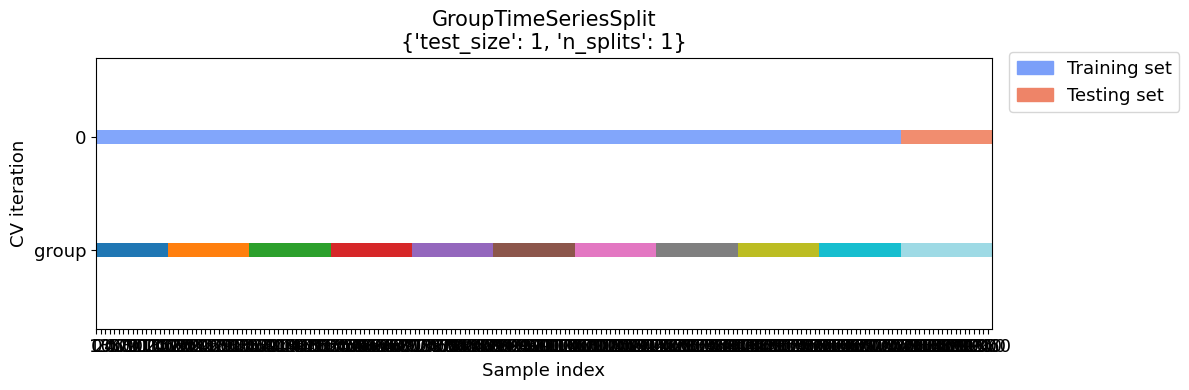

In [28]:
# Visualization
cv_args = {"test_size": int(0.125*groups_len), "n_splits": 1}
plot_splits(X, y, groups, **cv_args)

In [29]:
for i in range(num_lag):
    print('Lag -',i+1)
    print('The shape of X_train is:',X_train_list[i].shape)
    print('The shape of X_val is:',X_val_list[i].shape)
    print('The shape of X_test is:',X_test_list[i].shape)

Lag - 1
The shape of X_train is: (1969, 35)
The shape of X_val is: (358, 35)
The shape of X_test is: (358, 35)
Lag - 2
The shape of X_train is: (1790, 51)
The shape of X_val is: (358, 51)
The shape of X_test is: (358, 51)
Lag - 3
The shape of X_train is: (1611, 67)
The shape of X_val is: (358, 67)
The shape of X_test is: (358, 67)
Lag - 4
The shape of X_train is: (1432, 83)
The shape of X_val is: (358, 83)
The shape of X_test is: (358, 83)
Lag - 5
The shape of X_train is: (1253, 99)
The shape of X_val is: (358, 99)
The shape of X_test is: (358, 99)


In [30]:
from sklearn.model_selection import PredefinedSplit

ps_list = []
for i in range(num_lag):
    fold_index = np.zeros(len(train_id_list[i])+len(val_id_list[i]))
    fold_index[train_id_list[i]] = -1
    fold_index[val_id_list[i]] = 0
    ps = PredefinedSplit(test_fold=fold_index)
    ps_list.append(ps)
    print('Number of splits to be created by ps:',ps.get_n_splits())
    for i, (train_index, val_index) in enumerate(ps.split()):
        print(f"Fold {i}:")
        print(f"  Train: index={train_index}")
        print(f"  Validation:  index={val_index}")

Number of splits to be created by ps: 1
Fold 0:
  Train: index=[   0    1    2 ... 1966 1967 1968]
  Validation:  index=[1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982
 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996
 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024
 2025 2026 2027 2028 2029 2030 2031 2032 2033 2034 2035 2036 2037 2038
 2039 2040 2041 2042 2043 2044 2045 2046 2047 2048 2049 2050 2051 2052
 2053 2054 2055 2056 2057 2058 2059 2060 2061 2062 2063 2064 2065 2066
 2067 2068 2069 2070 2071 2072 2073 2074 2075 2076 2077 2078 2079 2080
 2081 2082 2083 2084 2085 2086 2087 2088 2089 2090 2091 2092 2093 2094
 2095 2096 2097 2098 2099 2100 2101 2102 2103 2104 2105 2106 2107 2108
 2109 2110 2111 2112 2113 2114 2115 2116 2117 2118 2119 2120 2121 2122
 2123 2124 2125 2126 2127 2128 2129 2130 2131 2132 2133 2134 2135 2136
 2137 2138 2139 2140 2141 21

In [31]:
ps_list

[PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
 PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
 PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
 PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
 PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0]))]

### 5. Preprocessing data

#### (1) Features for OrdinalEncoder Preprocessing

In [32]:
ordinal_ftrs = ['Economy Status'] 
ordinal_cats = [['Developed','Developing']]

#### (2) Features for OnehotEncoder Preprocessing

In [33]:
onehot_ftrs = ['Country','Region']

#### (3) Features for MinmaxScaling Preprocessing

In [34]:
minmax_ftrs1 = ['Year','Schooling','Schooling_lag1']
minmax_ftrs2 = ['Year','Schooling','Schooling_lag1', 'Schooling_lag2']
minmax_ftrs3 = ['Year','Schooling','Schooling_lag1', 'Schooling_lag2', 'Schooling_lag3']
minmax_ftrs4 = ['Year','Schooling','Schooling_lag1', 'Schooling_lag2', 'Schooling_lag3', 'Schooling_lag4']
minmax_ftrs5 = ['Year','Schooling','Schooling_lag1', 'Schooling_lag2', 'Schooling_lag3', 'Schooling_lag4', 'Schooling_lag5']

minmax_ftrs_list = [minmax_ftrs1, minmax_ftrs2, minmax_ftrs3, minmax_ftrs4, minmax_ftrs5]

#### (4) Features for StandardScaling Preprocessing

In [35]:
# lag1
std_ftrs1 = ['Infant Deaths', 'Under_Five Deaths',
       'Adult Mortality', 'Alcohol Consumption', 'Hepatitis B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents of HIV', 'GDP(per capita)',
       'Population', 'Thinness (ten to nineteen years)','Thinness (five to nine years)',

        'Infant Deaths_lag1', 'Under_Five Deaths_lag1', 'Adult Mortality_lag1',
       'Alcohol Consumption_lag1', 'Hepatitis B_lag1', 'Measles_lag1',
       'BMI_lag1', 'Polio_lag1', 'Diphtheria_lag1', 'Incidents of HIV_lag1',
       'GDP(per capita)_lag1', 'Population_lag1',
       'Thinness (ten to nineteen years)_lag1',
       'Thinness (five to nine years)_lag1', 
       'Life Expectancy_lag1']

# lag2
std_ftrs2 = ['Infant Deaths', 'Under_Five Deaths',
       'Adult Mortality', 'Alcohol Consumption', 'Hepatitis B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents of HIV', 'GDP(per capita)',
       'Population', 'Thinness (ten to nineteen years)','Thinness (five to nine years)',

        'Infant Deaths_lag1', 'Under_Five Deaths_lag1', 'Adult Mortality_lag1',
       'Alcohol Consumption_lag1', 'Hepatitis B_lag1', 'Measles_lag1',
       'BMI_lag1', 'Polio_lag1', 'Diphtheria_lag1', 'Incidents of HIV_lag1',
       'GDP(per capita)_lag1', 'Population_lag1',
       'Thinness (ten to nineteen years)_lag1',
       'Thinness (five to nine years)_lag1', 
       'Life Expectancy_lag1',

       'Infant Deaths_lag2', 'Under_Five Deaths_lag2',
       'Adult Mortality_lag2', 'Alcohol Consumption_lag2', 'Hepatitis B_lag2',
       'Measles_lag2', 'BMI_lag2', 'Polio_lag2', 'Diphtheria_lag2',
       'Incidents of HIV_lag2', 'GDP(per capita)_lag2', 'Population_lag2',
       'Thinness (ten to nineteen years)_lag2',
       'Thinness (five to nine years)_lag2',
       'Life Expectancy_lag2']

# lag3
std_ftrs3 = ['Infant Deaths', 'Under_Five Deaths',
       'Adult Mortality', 'Alcohol Consumption', 'Hepatitis B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents of HIV', 'GDP(per capita)',
       'Population', 'Thinness (ten to nineteen years)','Thinness (five to nine years)',

        'Infant Deaths_lag1', 'Under_Five Deaths_lag1', 'Adult Mortality_lag1',
       'Alcohol Consumption_lag1', 'Hepatitis B_lag1', 'Measles_lag1',
       'BMI_lag1', 'Polio_lag1', 'Diphtheria_lag1', 'Incidents of HIV_lag1',
       'GDP(per capita)_lag1', 'Population_lag1',
       'Thinness (ten to nineteen years)_lag1',
       'Thinness (five to nine years)_lag1', 
       'Life Expectancy_lag1',

       'Infant Deaths_lag2', 'Under_Five Deaths_lag2',
       'Adult Mortality_lag2', 'Alcohol Consumption_lag2', 'Hepatitis B_lag2',
       'Measles_lag2', 'BMI_lag2', 'Polio_lag2', 'Diphtheria_lag2',
       'Incidents of HIV_lag2', 'GDP(per capita)_lag2', 'Population_lag2',
       'Thinness (ten to nineteen years)_lag2',
       'Thinness (five to nine years)_lag2',
       'Life Expectancy_lag2', 
       
       'Infant Deaths_lag3', 'Under_Five Deaths_lag3',
       'Adult Mortality_lag3', 'Alcohol Consumption_lag3', 'Hepatitis B_lag3',
       'Measles_lag3', 'BMI_lag3', 'Polio_lag3', 'Diphtheria_lag3',
       'Incidents of HIV_lag3', 'GDP(per capita)_lag3', 'Population_lag3',
       'Thinness (ten to nineteen years)_lag3',
       'Thinness (five to nine years)_lag3',
       'Life Expectancy_lag3']

# lag4
std_ftrs4 = ['Infant Deaths', 'Under_Five Deaths',
       'Adult Mortality', 'Alcohol Consumption', 'Hepatitis B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents of HIV', 'GDP(per capita)',
       'Population', 'Thinness (ten to nineteen years)','Thinness (five to nine years)',

        'Infant Deaths_lag1', 'Under_Five Deaths_lag1', 'Adult Mortality_lag1',
       'Alcohol Consumption_lag1', 'Hepatitis B_lag1', 'Measles_lag1',
       'BMI_lag1', 'Polio_lag1', 'Diphtheria_lag1', 'Incidents of HIV_lag1',
       'GDP(per capita)_lag1', 'Population_lag1',
       'Thinness (ten to nineteen years)_lag1',
       'Thinness (five to nine years)_lag1', 
       'Life Expectancy_lag1',

       'Infant Deaths_lag2', 'Under_Five Deaths_lag2',
       'Adult Mortality_lag2', 'Alcohol Consumption_lag2', 'Hepatitis B_lag2',
       'Measles_lag2', 'BMI_lag2', 'Polio_lag2', 'Diphtheria_lag2',
       'Incidents of HIV_lag2', 'GDP(per capita)_lag2', 'Population_lag2',
       'Thinness (ten to nineteen years)_lag2',
       'Thinness (five to nine years)_lag2',
       'Life Expectancy_lag2', 
       
       'Infant Deaths_lag3', 'Under_Five Deaths_lag3',
       'Adult Mortality_lag3', 'Alcohol Consumption_lag3', 'Hepatitis B_lag3',
       'Measles_lag3', 'BMI_lag3', 'Polio_lag3', 'Diphtheria_lag3',
       'Incidents of HIV_lag3', 'GDP(per capita)_lag3', 'Population_lag3',
       'Thinness (ten to nineteen years)_lag3',
       'Thinness (five to nine years)_lag3',
       'Life Expectancy_lag3',
       
       'Infant Deaths_lag4', 'Under_Five Deaths_lag4',
       'Adult Mortality_lag4', 'Alcohol Consumption_lag4', 'Hepatitis B_lag4',
       'Measles_lag4', 'BMI_lag4', 'Polio_lag4', 'Diphtheria_lag4',
       'Incidents of HIV_lag4', 'GDP(per capita)_lag4', 'Population_lag4',
       'Thinness (ten to nineteen years)_lag4',
       'Thinness (five to nine years)_lag4',
       'Life Expectancy_lag4']

# lag5
std_ftrs5 = ['Infant Deaths', 'Under_Five Deaths',
       'Adult Mortality', 'Alcohol Consumption', 'Hepatitis B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents of HIV', 'GDP(per capita)',
       'Population', 'Thinness (ten to nineteen years)','Thinness (five to nine years)',

        'Infant Deaths_lag1', 'Under_Five Deaths_lag1', 'Adult Mortality_lag1',
       'Alcohol Consumption_lag1', 'Hepatitis B_lag1', 'Measles_lag1',
       'BMI_lag1', 'Polio_lag1', 'Diphtheria_lag1', 'Incidents of HIV_lag1',
       'GDP(per capita)_lag1', 'Population_lag1',
       'Thinness (ten to nineteen years)_lag1',
       'Thinness (five to nine years)_lag1', 
       'Life Expectancy_lag1',

       'Infant Deaths_lag2', 'Under_Five Deaths_lag2',
       'Adult Mortality_lag2', 'Alcohol Consumption_lag2', 'Hepatitis B_lag2',
       'Measles_lag2', 'BMI_lag2', 'Polio_lag2', 'Diphtheria_lag2',
       'Incidents of HIV_lag2', 'GDP(per capita)_lag2', 'Population_lag2',
       'Thinness (ten to nineteen years)_lag2',
       'Thinness (five to nine years)_lag2',
       'Life Expectancy_lag2', 
       
       'Infant Deaths_lag3', 'Under_Five Deaths_lag3',
       'Adult Mortality_lag3', 'Alcohol Consumption_lag3', 'Hepatitis B_lag3',
       'Measles_lag3', 'BMI_lag3', 'Polio_lag3', 'Diphtheria_lag3',
       'Incidents of HIV_lag3', 'GDP(per capita)_lag3', 'Population_lag3',
       'Thinness (ten to nineteen years)_lag3',
       'Thinness (five to nine years)_lag3',
       'Life Expectancy_lag3',
       
       'Infant Deaths_lag4', 'Under_Five Deaths_lag4',
       'Adult Mortality_lag4', 'Alcohol Consumption_lag4', 'Hepatitis B_lag4',
       'Measles_lag4', 'BMI_lag4', 'Polio_lag4', 'Diphtheria_lag4',
       'Incidents of HIV_lag4', 'GDP(per capita)_lag4', 'Population_lag4',
       'Thinness (ten to nineteen years)_lag4',
       'Thinness (five to nine years)_lag4',
       'Life Expectancy_lag4',

       'Infant Deaths_lag5', 'Under_Five Deaths_lag5',
       'Adult Mortality_lag5', 'Alcohol Consumption_lag5', 'Hepatitis B_lag5',
       'Measles_lag5', 'BMI_lag5', 'Polio_lag5', 'Diphtheria_lag5',
       'Incidents of HIV_lag5', 'GDP(per capita)_lag5', 'Population_lag5',
       'Thinness (ten to nineteen years)_lag5',
       'Thinness (five to nine years)_lag5',
       'Life Expectancy_lag5']

std_ftrs_list = [std_ftrs1, std_ftrs2, std_ftrs3, std_ftrs4, std_ftrs5]

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler

# collect all the encoders
preprocessor_list = []

for i in range(num_lag):
    preprocessor = ColumnTransformer(
        transformers=[
            ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
            ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), onehot_ftrs),
            ('minmax', MinMaxScaler(), minmax_ftrs_list[i]),
            ('std', StandardScaler(), std_ftrs_list[i])])
    
    preprocessor_list.append(preprocessor)

### 6. Choose an Evaluation Metric

In [37]:
def MLpipe_RMSE(X_other, X_test, y_other, y_test, preprocessor, ps, ML_algo, param_grid):
  
    nr_states = 10
    # lists to be returned 
    test_scores = np.zeros(nr_states)
    best_param = []
    final_models = []
    best_models = []

    for i in range(nr_states):

        # the machine learning algorithm
        ML = ML_algo()
        if ML_algo in [SVR,KNeighborsRegressor]:
            ML = ML_algo()
        else:
            ML = ML_algo(random_state = 42*i) # initialize the machine learning model
        
        final_scaler = StandardScaler()
        pipe = make_pipeline(preprocessor, final_scaler, ML)

        # use GridSearchCV
        # GridSearchCV loops through all parameter combinations and collects the results 
        grid = GridSearchCV(pipe, param_grid=param_grid, cv=ps, scoring = 'neg_root_mean_squared_error',return_train_score = True, n_jobs=-1, verbose=False, error_score='raise')
        grid.fit(X_other, y_other)

        # save results into a data frame. feel free to print it and inspect it
        results = pd.DataFrame(grid.cv_results_)
        #print(results)

        best_param.append(grid.best_params_)
        # print('best model parameters:',grid.best_params_)
        # print('validation score:',grid.best_score_) # this is the mean validation score over all iterations

        # save the model
        final_models.append(grid)
        # calculate and save the test score
        best_models = final_models[-1]
        y_test_pred = best_models.predict(X_test)
        test_scores[i] = np.sqrt(mean_squared_error(y_test,y_test_pred))
        print('test score:',test_scores[i])

    # np.random.seed(10)
    return best_param, best_models, test_scores

### 7. Construct Machine Learning Models

#### 1. Baseline Regression Model

In [38]:
from sklearn.metrics import mean_squared_error

baseline_list = []
for i in range(num_lag):
    baseline = np.mean(y_test_list[i])
    y_test_baseline = np.ones(len(y_test_list[i]))*baseline
    baseline_RMSE = np.sqrt(mean_squared_error(y_test_list[i],y_test_baseline))
    print(f'Baseline RMSE Score for data in lag {i+1} year(s):',baseline_RMSE)

    baseline_list.append(baseline)

Baseline RMSE Score for data in lag 1 year(s): 7.923316271119491
Baseline RMSE Score for data in lag 2 year(s): 7.923316271119491
Baseline RMSE Score for data in lag 3 year(s): 7.923316271119491
Baseline RMSE Score for data in lag 4 year(s): 7.923316271119491
Baseline RMSE Score for data in lag 5 year(s): 7.923316271119491


#### 2. Machine Learning Regression Model

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from  sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
import pickle
import warnings
warnings.filterwarnings("ignore")

##### (1) Lasso Linear Regression Model

In [121]:
# Lasso linear regression (with l1 regularization)

param_grid = {
              'lasso__alpha': np.logspace(-7,0,29),
              'lasso__max_iter':[100000]
              }

best_param_l1_list = []   
best_models_l1_list = []
test_scores_l1_list = []
mean_test_scores_l1_list = []
std_test_scores_l1_list = []

for i in range(num_lag):
    print('Lag - ',i+1)
    best_param, best_models, test_scores = MLpipe_RMSE(X_other_list[i], X_test_list[i], y_other_list[i], y_test_list[i], preprocessor_list[i], ps_list[i], Lasso, param_grid)
    mean_test_scores = np.mean(test_scores)
    std_test_scores = np.std(test_scores)
    print('The mean of test score (linear regression-l1 regularization) is:',mean_test_scores)
    print('The standard deviation of test score (linear regression-l1 regularization) is:',std_test_scores)

    best_param_l1_list.append(best_param)
    best_models_l1_list.append(best_models)
    test_scores_l1_list.append(test_scores)
    mean_test_scores_l1_list.append(mean_test_scores)
    std_test_scores_l1_list.append(std_test_scores)

file = open('../Result/Lasso_model.save', 'wb')
pickle.dump((best_param_l1_list, best_models_l1_list, test_scores_l1_list, mean_test_scores_l1_list, std_test_scores_l1_list),file)
file.close()

Lag -  1


/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.965e+01, tolerance: 1.826e+01
  model = cd_fast.enet_coordinate_descent(
/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.246e+01, tolerance: 1.826e+01
  model = cd_fast.enet_coordinate_descent(


test score: 0.2155084155355074


/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.965e+01, tolerance: 1.826e+01
  model = cd_fast.enet_coordinate_descent(
/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.246e+01, tolerance: 1.826e+01
  model = cd_fast.enet_coordinate_descent(


test score: 0.2155084155355074


/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.965e+01, tolerance: 1.826e+01
  model = cd_fast.enet_coordinate_descent(
/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.246e+01, tolerance: 1.826e+01
  model = cd_fast.enet_coordinate_descent(


test score: 0.2155084155355074


/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.246e+01, tolerance: 1.826e+01
  model = cd_fast.enet_coordinate_descent(
/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.965e+01, tolerance: 1.826e+01
  model = cd_fast.enet_coordinate_descent(


test score: 0.2155084155355074


/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.965e+01, tolerance: 1.826e+01
  model = cd_fast.enet_coordinate_descent(
/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.246e+01, tolerance: 1.826e+01
  model = cd_fast.enet_coordinate_descent(


test score: 0.2155084155355074


KeyboardInterrupt: 

##### (2) Ridge Linear Regression Model

In [126]:
# Ridge linear regression with l2 regularization

param_grid = {
              'ridge__alpha': np.logspace(-10,0,51)
              }

best_param_l2_list = []   
best_models_l2_list = []
test_scores_l2_list = []
mean_test_scores_l2_list = []
std_test_scores_l2_list = []

for i in range(num_lag):
    print('Lag - ',i+1)
    best_param, best_models, test_scores = MLpipe_RMSE(X_other_list[i], X_test_list[i], y_other_list[i], y_test_list[i], preprocessor_list[i], ps_list[i], Ridge, param_grid)
    mean_test_scores = np.mean(test_scores)
    std_test_scores = np.std(test_scores)
    print('The mean of test score (linear regression-l2 regularization) is:',mean_test_scores)
    print('The standard deviation of test score (linear regression-l2 regularization) is:',std_test_scores)

    best_param_l2_list.append(best_param)
    best_models_l2_list.append(best_models)
    test_scores_l2_list.append(test_scores)
    mean_test_scores_l2_list.append(mean_test_scores)
    std_test_scores_l2_list.append(std_test_scores)

file = open('../Result/Ridge_model.save', 'wb')
pickle.dump((best_param_l2_list, best_models_l2_list, test_scores_l2_list, mean_test_scores_l2_list, std_test_scores_l2_list),file)
file.close()

Lag -  1
test score: 0.21688019946259296
test score: 0.21688019946259296
test score: 0.21688019946259296
test score: 0.21688019946259296
test score: 0.21688019946259296
test score: 0.21688019946259296
test score: 0.21688019946259296
test score: 0.21688019946259296
test score: 0.21688019946259296
test score: 0.21688019946259296
The mean of test score (linear regression-l2 regularization) is: 0.21688019946259293
The standard deviation of test score (linear regression-l2 regularization) is: 2.7755575615628914e-17
Lag -  2
test score: 0.2253314171844607
test score: 0.2253314171844607
test score: 0.2253314171844607
test score: 0.2253314171844607
test score: 0.2253314171844607
test score: 0.2253314171844607
test score: 0.2253314171844607
test score: 0.2253314171844607
test score: 0.2253314171844607
test score: 0.2253314171844607
The mean of test score (linear regression-l2 regularization) is: 0.22533141718446076
The standard deviation of test score (linear regression-l2 regularization) is: 5

##### (3) Elastic Net Linear Regression Model

In [127]:
# linear regression with an elastic net

param_grid = {
              'elasticnet__l1_ratio': [0.1,0.3,0.5,0.7,0.9],
              'elasticnet__alpha': [0.1,0.5,1,2,5,10],
              'elasticnet__max_iter':[1000]
              }

best_param_EN_list = []   
best_models_EN_list = []
test_scores_EN_list = []
mean_test_scores_EN_list = []
std_test_scores_EN_list = []

for i in range(num_lag):
    print('Lag - ',i+1)
    best_param, best_models, test_scores = MLpipe_RMSE(X_other_list[i], X_test_list[i], y_other_list[i], y_test_list[i], preprocessor_list[i], ps_list[i], ElasticNet, param_grid)
    mean_test_scores = np.mean(test_scores)
    std_test_scores = np.std(test_scores)
    print('The mean of test score (linear regression with an elastic net) is:',mean_test_scores)
    print('The standard deviation of test score (linear regression with an elastic net) is:',std_test_scores)

    best_param_EN_list.append(best_param)
    best_models_EN_list.append(best_models)
    test_scores_EN_list.append(test_scores)
    mean_test_scores_EN_list.append(mean_test_scores)
    std_test_scores_EN_list.append(std_test_scores)

file = open('../Result/ElasticNet_model.save', 'wb')
pickle.dump((best_param_EN_list, best_models_EN_list, test_scores_EN_list, mean_test_scores_EN_list, std_test_scores_EN_list),file)
file.close()

Lag -  1


test score: 0.5141029084213831
test score: 0.5141029084213831
test score: 0.5141029084213831
test score: 0.5141029084213831
test score: 0.5141029084213831
test score: 0.5141029084213831
test score: 0.5141029084213831
test score: 0.5141029084213831
test score: 0.5141029084213831
test score: 0.5141029084213831
The mean of test score (linear regression with an elastic net) is: 0.5141029084213831
The standard deviation of test score (linear regression with an elastic net) is: 0.0
Lag -  2
test score: 0.4363234676748623
test score: 0.4363234676748623
test score: 0.4363234676748623
test score: 0.4363234676748623
test score: 0.4363234676748623
test score: 0.4363234676748623
test score: 0.4363234676748623
test score: 0.4363234676748623
test score: 0.4363234676748623
test score: 0.4363234676748623
The mean of test score (linear regression with an elastic net) is: 0.4363234676748623
The standard deviation of test score (linear regression with an elastic net) is: 0.0
Lag -  3


/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.655e+01, tolerance: 1.447e+01
  model = cd_fast.enet_coordinate_descent(


test score: 0.44268725256430075


/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.655e+01, tolerance: 1.447e+01
  model = cd_fast.enet_coordinate_descent(


test score: 0.44268725256430075


/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.655e+01, tolerance: 1.447e+01
  model = cd_fast.enet_coordinate_descent(


test score: 0.44268725256430075


/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.655e+01, tolerance: 1.447e+01
  model = cd_fast.enet_coordinate_descent(


test score: 0.44268725256430075


/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.655e+01, tolerance: 1.447e+01
  model = cd_fast.enet_coordinate_descent(


test score: 0.44268725256430075


/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.655e+01, tolerance: 1.447e+01
  model = cd_fast.enet_coordinate_descent(


test score: 0.44268725256430075


/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.655e+01, tolerance: 1.447e+01
  model = cd_fast.enet_coordinate_descent(


test score: 0.44268725256430075


/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.655e+01, tolerance: 1.447e+01
  model = cd_fast.enet_coordinate_descent(


test score: 0.44268725256430075


/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.655e+01, tolerance: 1.447e+01
  model = cd_fast.enet_coordinate_descent(


test score: 0.44268725256430075


/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.655e+01, tolerance: 1.447e+01
  model = cd_fast.enet_coordinate_descent(


test score: 0.44268725256430075
The mean of test score (linear regression with an elastic net) is: 0.44268725256430075
The standard deviation of test score (linear regression with an elastic net) is: 0.0
Lag -  4


/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.193e+01, tolerance: 1.262e+01
  model = cd_fast.enet_coordinate_descent(
/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.960e+01, tolerance: 1.262e+01
  model = cd_fast.enet_coordinate_descent(


test score: 0.4411961274311477


/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.193e+01, tolerance: 1.262e+01
  model = cd_fast.enet_coordinate_descent(
/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.960e+01, tolerance: 1.262e+01
  model = cd_fast.enet_coordinate_descent(


test score: 0.4411961274311477


/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.960e+01, tolerance: 1.262e+01
  model = cd_fast.enet_coordinate_descent(
/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.193e+01, tolerance: 1.262e+01
  model = cd_fast.enet_coordinate_descent(


test score: 0.4411961274311477


/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.960e+01, tolerance: 1.262e+01
  model = cd_fast.enet_coordinate_descent(
/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.193e+01, tolerance: 1.262e+01
  model = cd_fast.enet_coordinate_descent(


test score: 0.4411961274311477


/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.960e+01, tolerance: 1.262e+01
  model = cd_fast.enet_coordinate_descent(
/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.193e+01, tolerance: 1.262e+01
  model = cd_fast.enet_coordinate_descent(


test score: 0.4411961274311477


/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.193e+01, tolerance: 1.262e+01
  model = cd_fast.enet_coordinate_descent(
/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.960e+01, tolerance: 1.262e+01
  model = cd_fast.enet_coordinate_descent(


test score: 0.4411961274311477


/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.960e+01, tolerance: 1.262e+01
  model = cd_fast.enet_coordinate_descent(
/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.193e+01, tolerance: 1.262e+01
  model = cd_fast.enet_coordinate_descent(


test score: 0.4411961274311477


/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.193e+01, tolerance: 1.262e+01
  model = cd_fast.enet_coordinate_descent(
/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.960e+01, tolerance: 1.262e+01
  model = cd_fast.enet_coordinate_descent(


test score: 0.4411961274311477


/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.960e+01, tolerance: 1.262e+01
  model = cd_fast.enet_coordinate_descent(
/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.193e+01, tolerance: 1.262e+01
  model = cd_fast.enet_coordinate_descent(


test score: 0.4411961274311477


/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.960e+01, tolerance: 1.262e+01
  model = cd_fast.enet_coordinate_descent(
/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.193e+01, tolerance: 1.262e+01
  model = cd_fast.enet_coordinate_descent(


test score: 0.4411961274311477
The mean of test score (linear regression with an elastic net) is: 0.4411961274311477
The standard deviation of test score (linear regression with an elastic net) is: 0.0
Lag -  5


/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.413e+01, tolerance: 1.080e+01
  model = cd_fast.enet_coordinate_descent(
/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.472e+01, tolerance: 1.080e+01
  model = cd_fast.enet_coordinate_descent(


test score: 0.4349436118149864


/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.472e+01, tolerance: 1.080e+01
  model = cd_fast.enet_coordinate_descent(
/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.413e+01, tolerance: 1.080e+01
  model = cd_fast.enet_coordinate_descent(


test score: 0.4349436118149864


/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.472e+01, tolerance: 1.080e+01
  model = cd_fast.enet_coordinate_descent(
/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.413e+01, tolerance: 1.080e+01
  model = cd_fast.enet_coordinate_descent(


test score: 0.4349436118149864


/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.472e+01, tolerance: 1.080e+01
  model = cd_fast.enet_coordinate_descent(
/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.413e+01, tolerance: 1.080e+01
  model = cd_fast.enet_coordinate_descent(


test score: 0.4349436118149864


/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.472e+01, tolerance: 1.080e+01
  model = cd_fast.enet_coordinate_descent(
/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.413e+01, tolerance: 1.080e+01
  model = cd_fast.enet_coordinate_descent(


test score: 0.4349436118149864


/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.413e+01, tolerance: 1.080e+01
  model = cd_fast.enet_coordinate_descent(
/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.472e+01, tolerance: 1.080e+01
  model = cd_fast.enet_coordinate_descent(


test score: 0.4349436118149864


/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.472e+01, tolerance: 1.080e+01
  model = cd_fast.enet_coordinate_descent(
/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.413e+01, tolerance: 1.080e+01
  model = cd_fast.enet_coordinate_descent(


test score: 0.4349436118149864


/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.472e+01, tolerance: 1.080e+01
  model = cd_fast.enet_coordinate_descent(
/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.413e+01, tolerance: 1.080e+01
  model = cd_fast.enet_coordinate_descent(


test score: 0.4349436118149864


/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.413e+01, tolerance: 1.080e+01
  model = cd_fast.enet_coordinate_descent(
/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.472e+01, tolerance: 1.080e+01
  model = cd_fast.enet_coordinate_descent(


test score: 0.4349436118149864


/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.472e+01, tolerance: 1.080e+01
  model = cd_fast.enet_coordinate_descent(
/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.413e+01, tolerance: 1.080e+01
  model = cd_fast.enet_coordinate_descent(


test score: 0.4349436118149864
The mean of test score (linear regression with an elastic net) is: 0.4349436118149864
The standard deviation of test score (linear regression with an elastic net) is: 0.0


##### (4) Random Forest Model

In [129]:
# Random Forest

param_grid = {
              'randomforestregressor__max_depth': [1, 3, 10, 30, 100,None],
              'randomforestregressor__max_features': [0.5,0.75,1.0,None]
              }

best_param_RF_list = []   
best_models_RF_list = []
test_scores_RF_list = []
mean_test_scores_RF_list = []
std_test_scores_RF_list = []

for i in range(num_lag):
    print('Lag - ',i+1)          
    best_param, best_models, test_scores = MLpipe_RMSE(X_other_list[i], X_test_list[i], y_other_list[i], y_test_list[i], preprocessor_list[i], ps_list[i], RandomForestRegressor, param_grid)
    mean_test_scores = np.mean(test_scores)
    std_test_scores = np.std(test_scores)
    print('The mean of test score (RandomForestRegressor) is:',mean_test_scores)
    print('The standard deviation of test score (RandomForestRegressor) is:',std_test_scores)

    best_param_RF_list.append(best_param)
    best_models_RF_list.append(best_models)
    test_scores_RF_list.append(test_scores)
    mean_test_scores_RF_list.append(mean_test_scores)
    std_test_scores_RF_list.append(std_test_scores)

file = open('../Result/RandomForest_model.save', 'wb')
pickle.dump((best_param_RF_list, best_models_RF_list, test_scores_RF_list, mean_test_scores_RF_list, std_test_scores_RF_list),file)
file.close()

Lag -  1


test score: 0.2544184572641051
test score: 0.2569838755457272
test score: 0.24988884120923102
test score: 0.2545249600869461
test score: 0.2550340156959659
test score: 0.25216182066062526
test score: 0.2527421324539113
test score: 0.2546148111907568
test score: 0.2577732087935158
test score: 0.2523311980702194
The mean of test score (RandomForestRegressor) is: 0.2540473320971004
The standard deviation of test score (RandomForestRegressor) is: 0.002228536424723875
Lag -  2
test score: 0.2495785889595467
test score: 0.24476150134340663
test score: 0.24677456262170078
test score: 0.24857130796657215
test score: 0.24884416047220442
test score: 0.2497693946752981
test score: 0.25198448675314195
test score: 0.24483079894435197
test score: 0.247418504498219
test score: 0.24878392412228703
The mean of test score (RandomForestRegressor) is: 0.24813172303567285
The standard deviation of test score (RandomForestRegressor) is: 0.0021295634556518298
Lag -  3
test score: 0.24029215225586045
test sco

##### (5) Support Vector Machine Model - Regressor

In [ ]:
# Support Vector Machine(SVM)-Regressor

param_grid = {
              'svr__gamma': [1e-3, 1e-1, 1e1, 1e3, 1e5],
              'svr__C': [1e-1, 1e0, 1e1]
              }

best_param_SVM_list = []   
best_models_SVM_list = []
test_scores_SVM_list = []
mean_test_scores_SVM_list = []
std_test_scores_SVM_list = []

for i in range(num_lag):
    print('Lag - ',i+1) 
    best_param, best_models, test_scores = MLpipe_RMSE(X_other_list[i], X_test_list[i], y_other_list[i], y_test_list[i], preprocessor_list[i], ps_list[i], SVR, param_grid)
    mean_test_scores = np.mean(test_scores)
    std_test_scores = np.std(test_scores)
    print('The mean of test score (SVM) is:',mean_test_scores)
    print('The standard deviation of test score (SVM) is:',std_test_scores)

    best_param_SVM_list.append(best_param)
    best_models_SVM_list.append(best_models)
    test_scores_SVM_list.append(test_scores)
    mean_test_scores_SVM_list.append(mean_test_scores)
    std_test_scores_SVM_list.append(std_test_scores)

file = open('../Result/SVM_model.save', 'wb')
pickle.dump((best_param_SVM_list, best_models_SVM_list, test_scores_SVM_list, mean_test_scores_SVM_list, std_test_scores_SVM_list),file)
file.close()

test score: 0.4429593041907852
test score: 0.4429593041907852
test score: 0.4429593041907852
test score: 0.4429593041907852
test score: 0.4429593041907852
test score: 0.4429593041907852
test score: 0.4429593041907852
test score: 0.4429593041907852
test score: 0.4429593041907852
test score: 0.4429593041907852
The mean of test score (SVM) is: 0.4429593041907852
The standard deviation of test score (SVM) is: 0.0


##### (6) K Nearest Regression Model

In [ ]:
# K nearest neighbor regression

param_grid = {
              'kneighborsregressor__n_neighbors': [1,3,10,30]
              }
              
best_param_KNN_list = []   
best_models_KNN_list = []
test_scores_KNN_list = []
mean_test_scores_KNN_list = []
std_test_scores_KNN_list = []

for i in range(num_lag):
    print('Lag - ',i+1) 
    best_param, best_models, test_scores = MLpipe_RMSE(X_other_list[i], X_test_list[i], y_other_list[i], y_test_list[i], preprocessor_list[i], ps_list[i], KNeighborsRegressor, param_grid)
    mean_test_scores = np.mean(test_scores)
    std_test_scores = np.std(test_scores)
    print('The mean of test score (KNeighborsRegressor) is:',mean_test_scores)
    print('The standard deviation of test score (KNeighborsRegressor) is:',std_test_scores)

    best_param_KNN_list.append(best_param)
    best_models_KNN_list.append(best_models)
    test_scores_KNN_list.append(test_scores)
    mean_test_scores_KNN_list.append(mean_test_scores)
    std_test_scores_KNN_list.append(std_test_scores)

file = open('../Result/KNN_model.save', 'wb')
pickle.dump((best_param_KNN_list, best_models_KNN_list, test_scores_KNN_list, mean_test_scores_KNN_list, std_test_scores_KNN_list),file)
file.close()

test score: 0.9482562650117728
test score: 0.9482562650117728
test score: 0.9482562650117728
test score: 0.9482562650117728
test score: 0.9482562650117728
test score: 0.9482562650117728
test score: 0.9482562650117728
test score: 0.9482562650117728
test score: 0.9482562650117728
test score: 0.9482562650117728
The mean of test score (KNeighborsRegressor) is: 0.9482562650117728
The standard deviation of test score (KNeighborsRegressor) is: 0.0


##### (7) XGBoost Model

In [253]:
# XGBoost
import xgboost
from sklearn.model_selection import ParameterGrid

mean_test_scores_XGB_list = []
std_test_scores_XGB_list = []

for l in range(num_lag):
    prep = Pipeline(steps=[('preprocessor', preprocessor_list[l])]) # for now we only preprocess 

    df_train = prep.fit_transform(X_train_list[l])
    df_val = prep.transform(X_val_list[l])
    df_test = prep.transform(X_test_list[l])

    feature_names = prep.get_feature_names_out()

    df_train = pd.DataFrame(data=df_train, columns=feature_names)
    df_val = pd.DataFrame(data=df_val, columns=feature_names)
    df_test = pd.DataFrame(data=df_test, columns=feature_names)

    param_grid = {
                'xgbregressor__learning_rate': [0.03],
                'xgbregressor__n_estimators': [10000],
                'xgbregressor__seed': [0],
                'xgbregressor__reg_alpha': [0e0, 1e-2, 1e-1, 1e0, 1e1, 1e2],
                'xgbregressor__reg_lambda': [0e0, 1e-2, 1e-1, 1e0, 1e1, 1e2],
                'xgbregressor__missing': [np.nan], 
                'xgbregressor__max_depth': [1,3,10,30,100],
                'xgbregressor__colsample_bytree': [0.9],
                'xgbregressor__subsample': [0.66],
                }

    nr_states = 10
    test_scores = np.zeros(nr_states)

    for i in range(nr_states):
        XGB = xgboost.XGBRegressor(random_state=42*i)
        grid_search = GridSearchCV(estimator=XGB, param_grid=param_grid, scoring='neg_root_mean_squared_error', return_train_score = True, verbose=False, n_jobs=-1)
        grid_search.set_params(estimator__early_stopping_rounds=100)
        grid_search.fit(df_train, y_train_list[l], eval_set=[(df_val, y_val_list[l])],verbose=False)
        best_model = grid_search.best_estimator_
        y_test_pred = best_model.predict(df_test)
        test_scores[i] = np.sqrt(mean_squared_error(y_test_list[l],y_test_pred))
        print("Best Hyperparameters:", grid_search.best_params_)
        print('the test score:',test_scores[i])

    mean_test_scores = np.mean(test_scores)
    std_test_scores = np.std(test_scores)
    print('The mean of test score (XgBoost) is:',mean_test_scores)
    print('The standard deviation of test score (XgBoost) is:',std_test_scores)

    mean_test_scores_XGB_list.append(mean_test_scores)
    std_test_scores_XGB_list.append(std_test_scores)

file = open('../Result/XGB_model.save', 'wb')
pickle.dump((mean_test_scores_XGB_list, std_test_scores_XGB_list),file)
file.close()

[21:41:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1697107893992/work/src/learner.cc:767: 
Parameters: { "xgbregressor__colsample_bytree", "xgbregressor__learning_rate", "xgbregressor__max_depth", "xgbregressor__missing", "xgbregressor__n_estimators", "xgbregressor__reg_alpha", "xgbregressor__reg_lambda", "xgbregressor__seed", "xgbregressor__subsample" } are not used.

[21:41:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1697107893992/work/src/learner.cc:767: 
Parameters: { "xgbregressor__colsample_bytree", "xgbregressor__learning_rate", "xgbregressor__max_depth", "xgbregressor__missing", "xgbregressor__n_estimators", "xgbregressor__reg_alpha", "xgbregressor__reg_lambda", "xgbregressor__seed", "xgbregressor__subsample" } are not used.

[21:41:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1697107893992/work/src/learner.cc:767: 
Parameters: { "xgbregressor__colsample_bytree", "xgbregressor__learning_rate", "xgbregressor__max_depth", "xgbr

KeyboardInterrupt: 

##### (8) Model Comparison

In [40]:
import pickle

file_Lasso = open('../Result/Lasso_model.save', 'rb')
best_param_l1_list, best_models_l1_list, test_scores_l1_list, mean_test_scores_l1_list, std_test_scores_l1_list = pickle.load(file_Lasso)

file_Ridge = open('../Result/Ridge_model.save', 'rb')
best_param_l2_list, best_models_l2_list, test_scores_l2_list, mean_test_scores_l2_list, std_test_scores_l2_list = pickle.load(file_Ridge)

file_ElasticNet = open('../Result/ElasticNet_model.save', 'rb')
best_param_EN_list, best_models_EN_list, test_scores_EN_list, mean_test_scores_EN_list, std_test_scores_EN_list = pickle.load(file_ElasticNet)

file_RandomForest = open('../Result/RandomForest_model.save', 'rb')
best_param_RF_list, best_models_RF_list, test_scores_RF_list, mean_test_scores_RF_list, std_test_scores_RF_list = pickle.load(file_RandomForest)

file_SVM = open('../Result/SVM_model.save', 'rb')
best_param_SVM_list, best_models_SVM_list, test_scores_SVM_list, mean_test_scores_SVM_list, std_test_scores_SVM_list = pickle.load(file_SVM)

file_KNN = open('../Result/KNN_model.save', 'rb')
best_param_KNN_list, best_models_KNN_list, test_scores_KNN_list, mean_test_scores_KNN_list, std_test_scores_KNN_list = pickle.load(file_KNN)

file_XGB = open('../Result/XGB_model.save', 'rb')
mean_test_scores_XGB_list, std_test_scores_XGB_list = pickle.load(file_XGB)

In [41]:
all_meanscore = []
all_meanscore.append(mean_test_scores_l1_list)
all_meanscore.append(mean_test_scores_l2_list)
all_meanscore.append(mean_test_scores_EN_list)
all_meanscore.append(mean_test_scores_RF_list)
all_meanscore.append(mean_test_scores_SVM_list)
all_meanscore.append(mean_test_scores_KNN_list)
all_meanscore.append(mean_test_scores_XGB_list)
all_meanscore = pd.DataFrame(data=all_meanscore,index=['Lasso','Ridge','Elastic Net','Random Forest','SVM','KNeighbors','XGBoost'],columns=['Lag1','Lag2','Lag3','Lag4','Lag5'])
all_meanscore

Lag1      Lag2      Lag3      Lag4      Lag5
Lasso          0.215495  0.231490  0.223119  0.197771  0.207359
Ridge          0.216880  0.225331  0.225992  0.221687  0.222925
Elastic Net    0.514103  0.436323  0.442687  0.441196  0.434944
Random Forest  0.254565  0.247719  0.240745  0.240390  0.242029
SVM            0.541204  0.450524  0.442974  0.456762  0.470739
KNeighbors     1.125492  0.950184  0.948256  0.837161  0.863813
XGBoost        0.326113  0.330426  0.344034  0.351152  0.387676

In [42]:
all_stdscore = []
all_stdscore.append(std_test_scores_l1_list)
all_stdscore.append(std_test_scores_l2_list)
all_stdscore.append(std_test_scores_EN_list)
all_stdscore.append(std_test_scores_RF_list)
all_stdscore.append(std_test_scores_SVM_list)
all_stdscore.append(std_test_scores_KNN_list)
all_stdscore.append(std_test_scores_XGB_list)
all_stdscore = pd.DataFrame(data=all_stdscore,index=['Lasso','Ridge','Elastic Net','Random Forest','SVM','KNeighbors','XGBoost'],columns=['Lag1','Lag2','Lag3','Lag4','Lag5'])
all_stdscore

Lag1          Lag2          Lag3          Lag4  \
Lasso          2.775558e-17  2.775558e-17  2.775558e-17  0.000000e+00   
Ridge          2.775558e-17  0.000000e+00  2.775558e-17  0.000000e+00   
Elastic Net    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Random Forest  3.460289e-03  1.254629e-03  1.674279e-03  2.456099e-03   
SVM            0.000000e+00  0.000000e+00  5.551115e-17  5.551115e-17   
KNeighbors     2.220446e-16  0.000000e+00  0.000000e+00  0.000000e+00   
XGBoost        0.000000e+00  5.551115e-17  0.000000e+00  0.000000e+00   

                       Lag5  
Lasso          0.000000e+00  
Ridge          2.775558e-17  
Elastic Net    0.000000e+00  
Random Forest  3.146056e-03  
SVM            0.000000e+00  
KNeighbors     1.110223e-16  
XGBoost        5.551115e-17

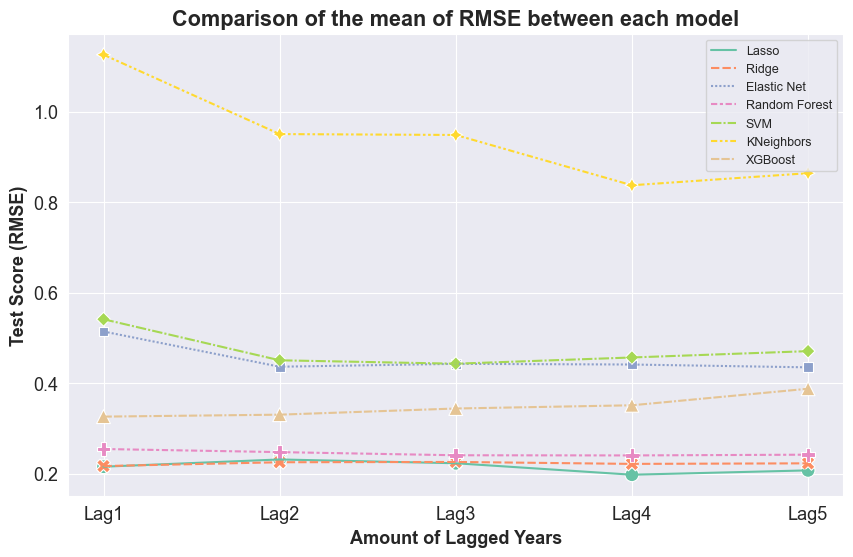

In [52]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

# create plots for the mean of test score for all models
fig, ax = plt.subplots(figsize=(10, 6))
lineplot = sns.lineplot(all_meanscore.T)
scatterplot = sns.scatterplot(all_meanscore.T,s=100,legend=False)
lineplot.set_xticks([0,1,2,3,4])
plt.title('Comparison of the mean of RMSE between each model',weight='bold')
plt.xlabel('Amount of Lagged Years',weight='bold')
plt.ylabel('Test Score (RMSE)',weight='bold')
plt.legend(loc='upper right',fontsize = 9)
plt.savefig('../Figure/Model Test Score Comparison (Mean).png',dpi=600)
plt.show()

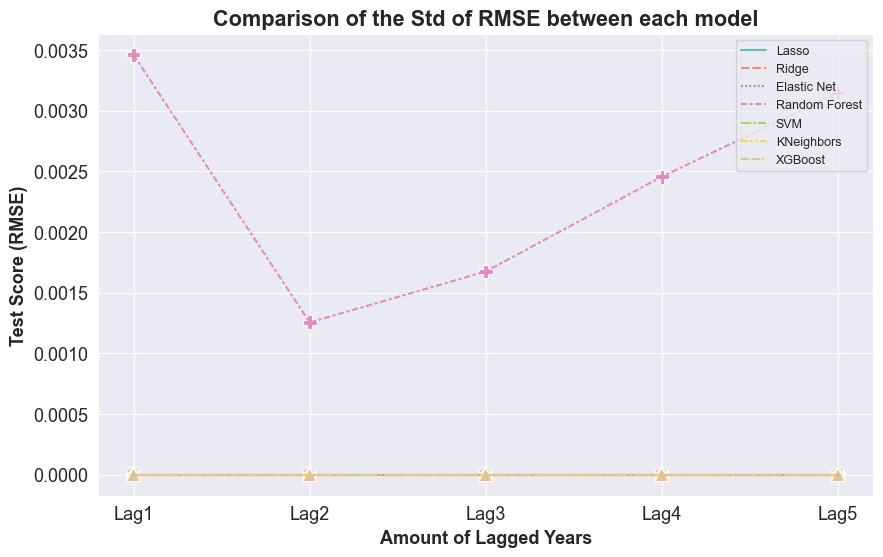

In [53]:
# create plots for the std of test score for all models
fig, ax = plt.subplots(figsize=(10, 6))
lineplot = sns.lineplot(all_stdscore.T)
scatterplot = sns.scatterplot(all_stdscore.T,s=100,legend=False)
lineplot.set_xticks([0,1,2,3,4])
plt.title('Comparison of the Std of RMSE between each model',weight='bold')
plt.xlabel('Amount of Lagged Years',weight='bold')
plt.ylabel('Test Score (RMSE)',weight='bold')
plt.legend(loc='upper right',fontsize = 9)
plt.savefig('../Figure/Model Test Score Comparison (Std).png',dpi=600)
plt.show()

### 8. Interpretability

In [43]:
for i in range(all_meanscore.shape[0]):
    print('The best number of lag year by using '+all_meanscore.index[i]+' is :')
    column_idx = np.argmin(all_meanscore.iloc[i,:])
    # column_idx = all_meanscore.iloc[i, :].idxmin()
    print(all_meanscore.columns[column_idx])

The best number of lag year by using Lasso is :
Lag4
The best number of lag year by using Ridge is :
Lag1
The best number of lag year by using Elastic Net is :
Lag5
The best number of lag year by using Random Forest is :
Lag4
The best number of lag year by using SVM is :
Lag3
The best number of lag year by using KNeighbors is :
Lag4
The best number of lag year by using XGBoost is :
Lag1


##### (1) Lasso Regression - Lag 4 years

In [44]:
best_models_l1_list[3]

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             error_score='raise',
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('ord',
                                                                         OrdinalEncoder(categories=[['Developed',
                                                                                                     'Developing']]),
                                                                         ['Economy '
                                                                          'Status']),
                                                                        ('onehot',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Country',
                                                                          'Region']),
                                                                        ('minmax',...
       1.00000000e-04, 1.77827941e-04, 3.16227766e-04, 5.62341325e-04,
       1.00000000e-03, 1.77827941e-03, 3.16227766e-03, 5.62341325e-03,
       1.00000000e-02, 1.77827941e-02, 3.16227766e-02, 5.62341325e-02,
       1.00000000e-01, 1.77827941e-01, 3.16227766e-01, 5.62341325e-01,
       1.00000000e+00]),
                         'lasso__max_iter': [10000]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=False)

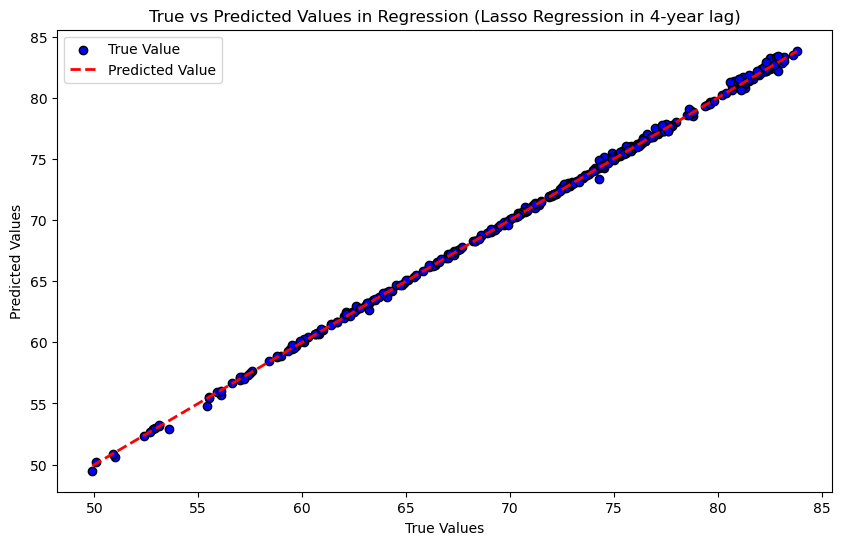

In [45]:
y_test_pred = best_models_l1_list[3].predict(X_test_list[3])
plt.figure(figsize=(10,6))
plt.scatter(y_test_list[3], y_test_pred, color='blue', edgecolors=(0, 0, 0),label='True Value')
plt.plot([y_test_list[3].min(), y_test_list[3].max()], [y_test_list[3].min(), y_test_list[3].max()], linestyle='--', color='red', linewidth=2,label='Predicted Value')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values in Regression (Lasso Regression in 4-year lag)')
plt.legend()
plt.savefig('../Figure/True vs. Predicted (Lasso Regression in 4-year lag).png', dpi=600)
plt.show()

                        Importance score
BMI                            12.203547
Incidents of HIV_lag4           1.143232
Adult Mortality_lag3            1.065763
Under_Five Deaths               0.637448
Under_Five Deaths_lag4          0.260182
Adult Mortality_lag4            0.069208
Adult Mortality_lag2            0.022872
Adult Mortality                 0.016395
Life Expectancy_lag4            0.006776
Life Expectancy_lag1            0.001407


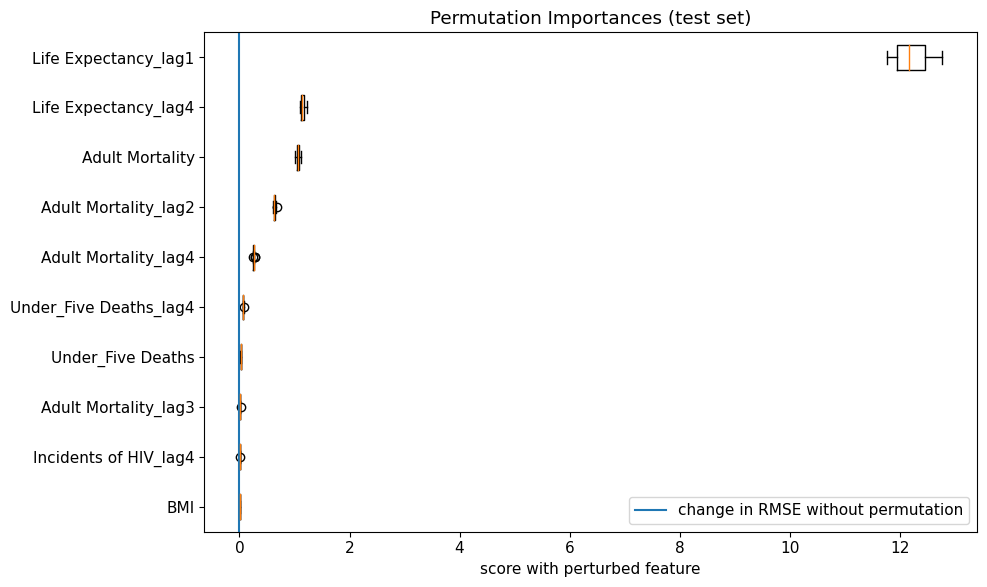

In [46]:
from sklearn.inspection import permutation_importance

#(1) Calculate the feature importance
model = best_models_l1_list[3]
ftr_names = X_test_list[3].columns
result = permutation_importance(model, X_test_list[3], y_test_list[3], scoring='neg_root_mean_squared_error', n_repeats=10, random_state=42)
sorted_indcs = np.argsort(result.importances_mean)[-10:]
top10_ftr_importance = pd.DataFrame(data=result.importances_mean[sorted_indcs][::-1],index=ftr_names[sorted_indcs],columns=['Importance score'])
print(top10_ftr_importance)

# (2) Plot out the top 10 important feature
plt.rcParams.update({'font.size': 11})
plt.figure(figsize=(10,6))
plt.boxplot(result.importances[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.axvline(0,label='change in RMSE without permutation')
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()
plt.savefig('../Figure/Permutation Importance - Lasso - Lag 4 years.png',dpi=600)
plt.show()

In [47]:
prep = Pipeline(steps=[('preprocessor', preprocessor_list[3])]) # for now we only preprocess 
df_train_prep = prep.fit_transform(X_train_list[3])
df_val_prep = prep.transform(X_val_list[3])
df_test_prep = prep.transform(X_test_list[3])

feature_names = preprocessor_list[3].get_feature_names_out()

df_train_prep = pd.DataFrame(df_train_prep,columns=feature_names)
df_val_prep = pd.DataFrame(df_val_prep,columns=feature_names)
df_test_prep = pd.DataFrame(df_test_prep,columns=feature_names)

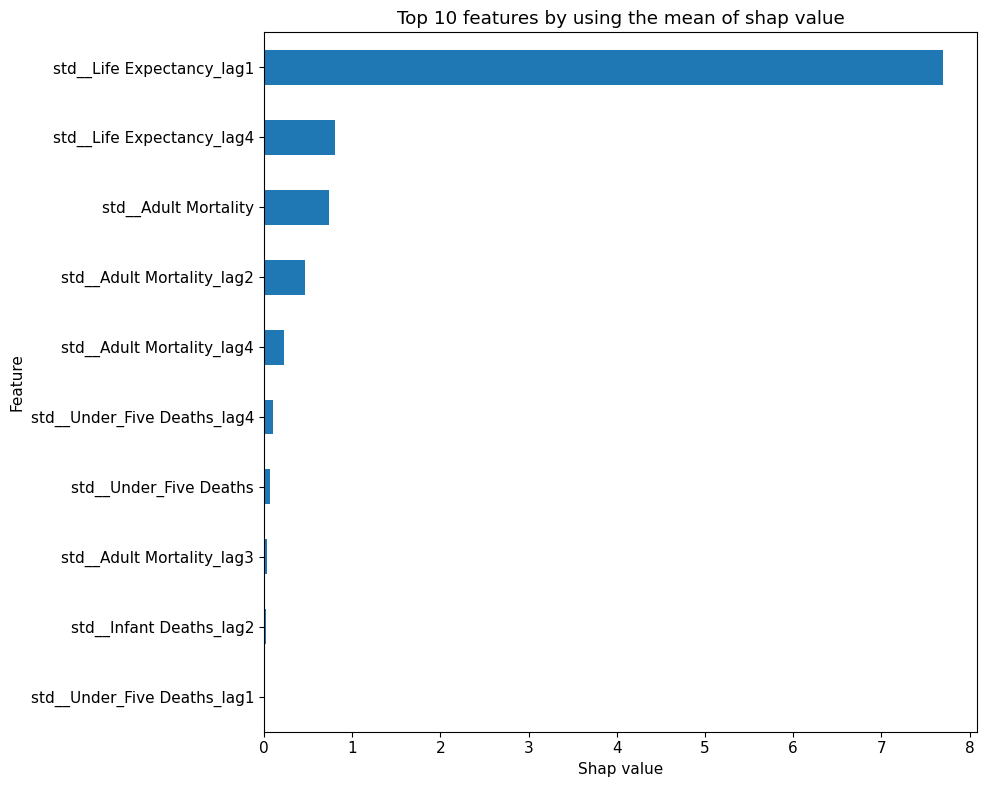

In [48]:
import shap
shap.initjs()

# Calcaulate shap value and top 10 features
masker = shap.maskers.Independent(data=df_train_prep)
explainer = shap.LinearExplainer(model.best_estimator_.named_steps['lasso'], masker)
shap_values = explainer.shap_values(df_test_prep)
shap_values = pd.DataFrame(data=shap_values,columns=feature_names)
shap_mean = np.mean(np.abs(shap_values),axis=0)
top10_shap_idx = np.argsort(shap_mean)[-10:][::-1]
top10_shap_values = shap_mean[top10_shap_idx]

# Create a figure
plt.figure(figsize=(10,8))
top10_shap_values[::-1].plot.barh()
plt.xlabel('Shap value')
plt.ylabel('Feature')
plt.title('Top 10 features by using the mean of shap value')
plt.tight_layout()
plt.savefig('../Figure/Top 10 features - Lasso - Lag 4 years.png',dpi=600)
plt.show()

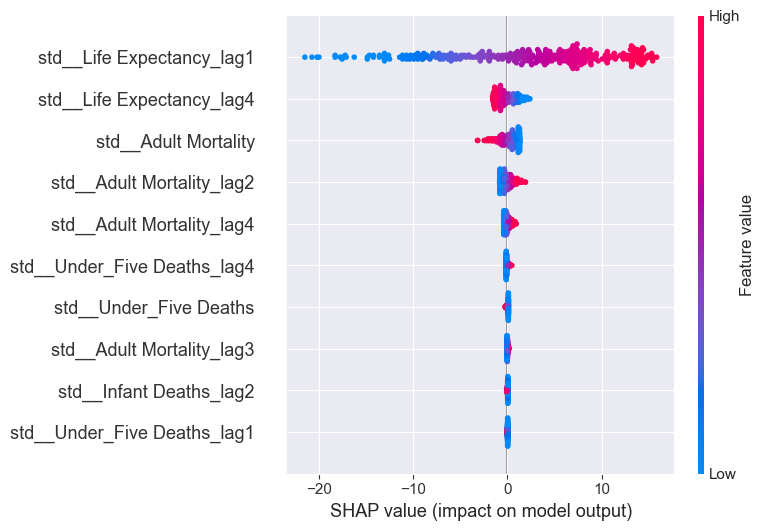

In [60]:
shap_values = explainer.shap_values(df_test_prep)
shap.summary_plot(shap_values, df_test_prep, max_display=10,feature_names = feature_names)

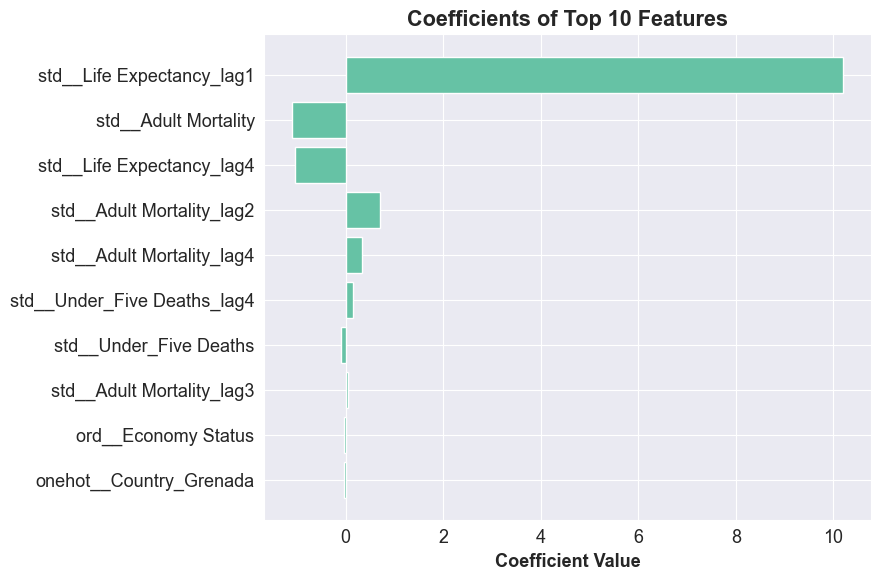

In [56]:
# coefficients for the ridge model 
coefs = model.best_estimator_[-1].coef_
sorted_indcs = np.argsort(np.abs(coefs))

# plot and label figure 
plt.figure(figsize=(9,6))
plt.rcParams.update({'font.size': 13})
plt.barh(np.arange(10),coefs[sorted_indcs[-10:]])
plt.yticks(np.arange(10),feature_names[sorted_indcs[-10:]])
plt.xlabel('Coefficient Value',weight='bold')
plt.title('Coefficients of Top 10 Features',weight='bold')
plt.tight_layout()

# save figure to fold 
plt.savefig('../Figure/coeff_importance - Lasso - Lag 4 years.png',dpi=300)
plt.show()


index =  187
69.54683662623916


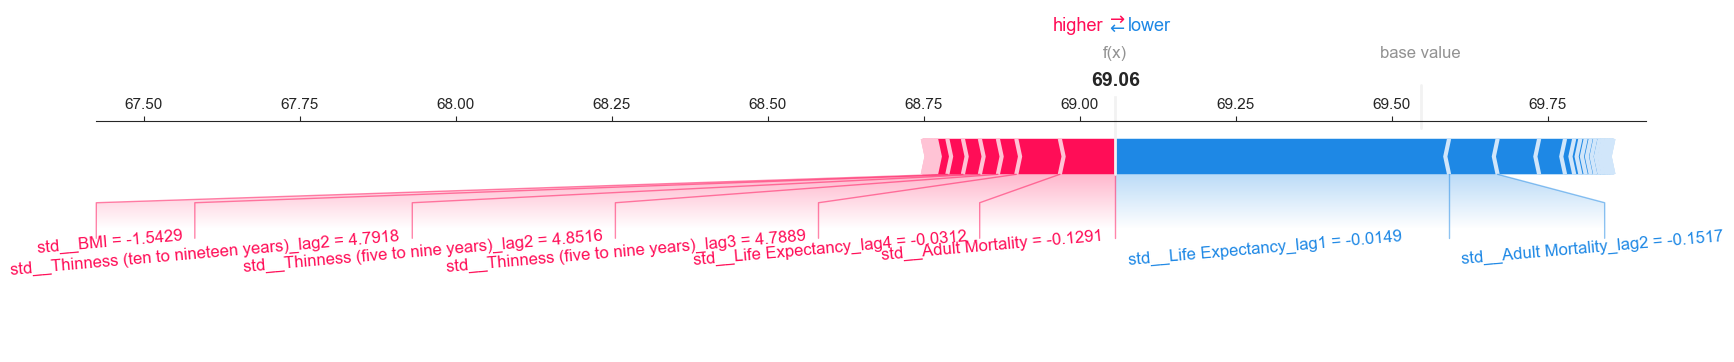

index =  231
69.54683662623916


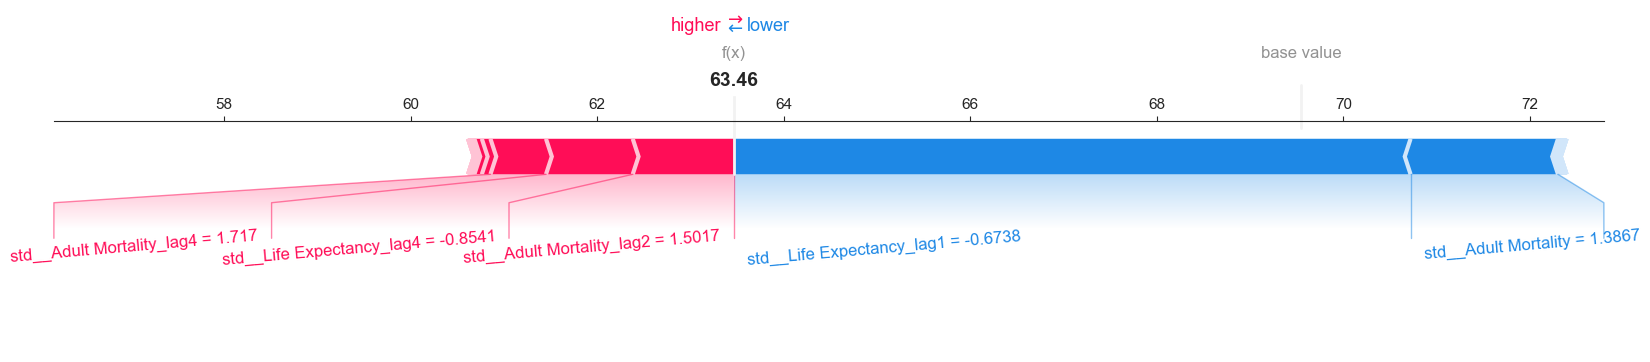

index =  267
69.54683662623916


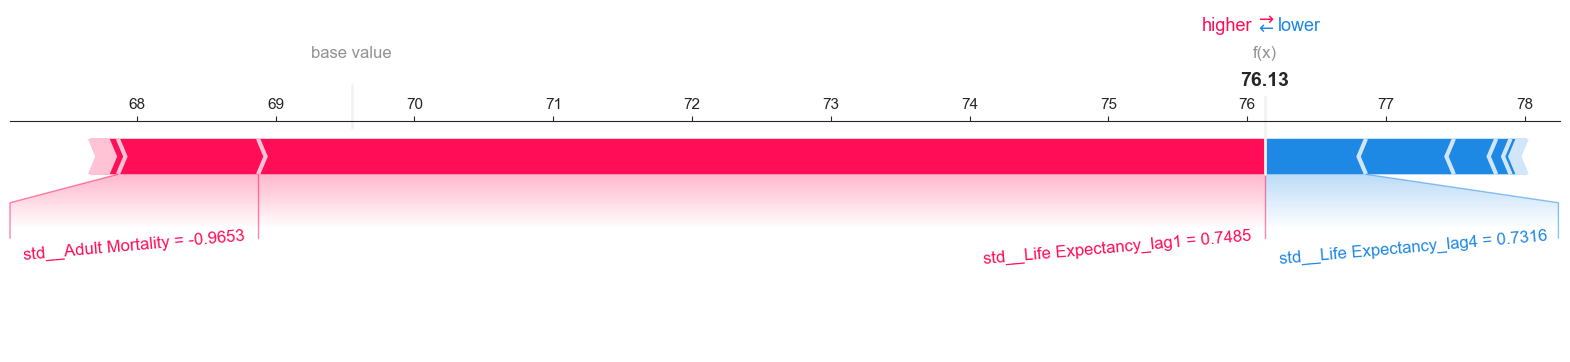

In [146]:
index = [187,231,267] # the index of the point to explain: 187-India, 231-South Africa, 267-China
shap_values = pd.DataFrame(data=shap_values,columns=feature_names)
sns.set_style('white') 
sns.set_palette('deep')
for i in index:
    print('index = ',i)
    print(explainer.expected_value) # the baseline value
    shap.force_plot(explainer.expected_value, shap_values.loc[i,:].values, features = np.around(df_test_prep.loc[i,:].values,4),feature_names = feature_names,matplotlib=True,figsize=(20,3),text_rotation=5)

##### (2) Ridge Regression - Lag 1 year

In [103]:
best_models_l2_list[0]

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             error_score='raise',
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('ord',
                                                                         OrdinalEncoder(categories=[['Developed',
                                                                                                     'Developing']]),
                                                                         ['Economy '
                                                                          'Status']),
                                                                        ('onehot',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Country',
                                                                          'Region']),
                                                                        ('minmax',...
       2.51188643e-04, 3.98107171e-04, 6.30957344e-04, 1.00000000e-03,
       1.58489319e-03, 2.51188643e-03, 3.98107171e-03, 6.30957344e-03,
       1.00000000e-02, 1.58489319e-02, 2.51188643e-02, 3.98107171e-02,
       6.30957344e-02, 1.00000000e-01, 1.58489319e-01, 2.51188643e-01,
       3.98107171e-01, 6.30957344e-01, 1.00000000e+00])},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=False)

                        Importance score
Region                          9.134672
Infant Deaths                   2.845587
Economy Status                  2.018335
Under_Five Deaths_lag1          0.398401
Incidents of HIV                0.373323
Infant Deaths_lag1              0.277999
Country                         0.225509
Adult Mortality_lag1            0.165096
Adult Mortality                 0.130569
Life Expectancy_lag1            0.114842


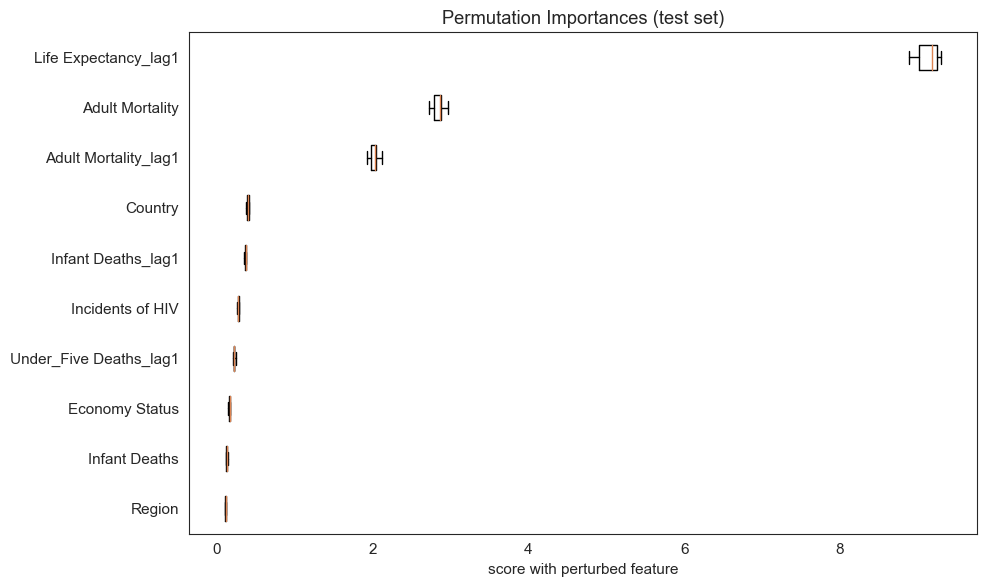

In [104]:
from sklearn.inspection import permutation_importance

#(1) Calculate the feature importance
model = best_models_l2_list[0]
ftr_names = X_test_list[0].columns
result = permutation_importance(model, X_test_list[0], y_test_list[0], scoring='neg_root_mean_squared_error', n_repeats=10, random_state=42)
sorted_indcs = np.argsort(result.importances_mean)[-10:]
top10_ftr_importance = pd.DataFrame(data=result.importances_mean[sorted_indcs][::-1],index=ftr_names[sorted_indcs],columns=['Importance score'])
print(top10_ftr_importance)

# (2) Plot out the top 10 important feature
plt.rcParams.update({'font.size': 11})
plt.figure(figsize=(10,6))
plt.boxplot(result.importances[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.tight_layout()
plt.show()

In [108]:
prep = Pipeline(steps=[('preprocessor', preprocessor_list[0])]) # for now we only preprocess 
df_train_prep = prep.fit_transform(X_train_list[0])
df_val_prep = prep.transform(X_val_list[0])
df_test_prep = prep.transform(X_test_list[0])

feature_names = preprocessor_list[0].get_feature_names_out()

df_train_prep = pd.DataFrame(df_train_prep,columns=feature_names)
df_val_prep = pd.DataFrame(df_val_prep,columns=feature_names)
df_test_prep = pd.DataFrame(df_test_prep,columns=feature_names)

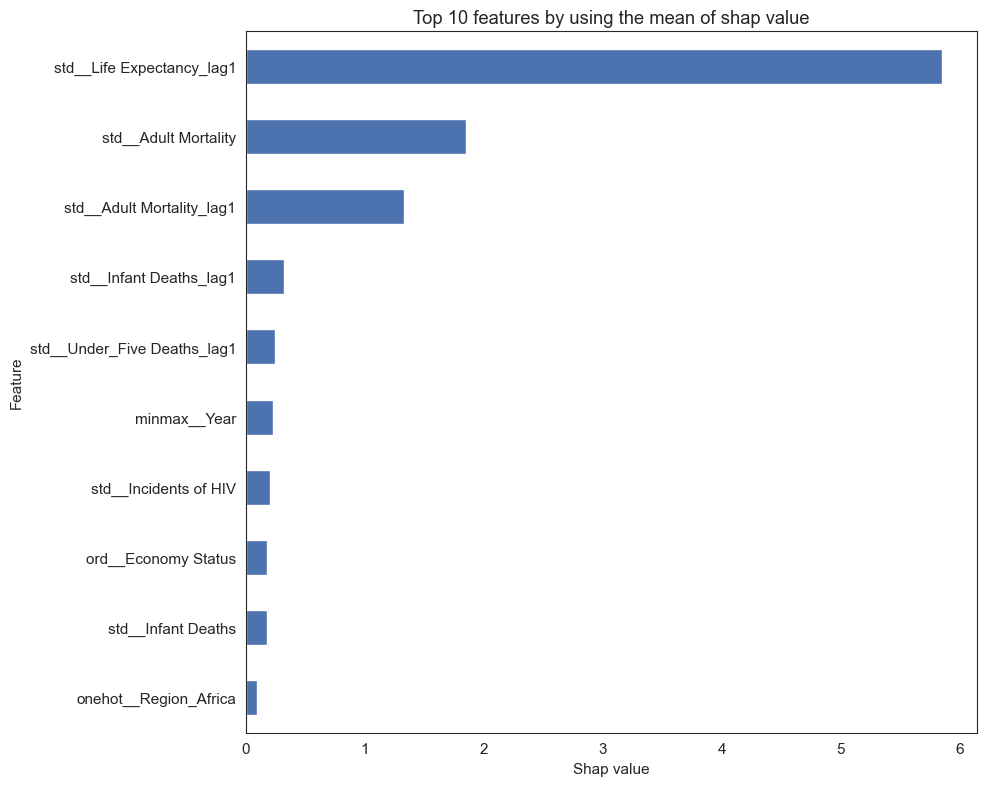

In [109]:
import shap
shap.initjs()

# Calcaulate shap value and top 10 features
masker = shap.maskers.Independent(data=df_train_prep)
explainer = shap.LinearExplainer(model.best_estimator_.named_steps['ridge'], masker)
shap_values = explainer.shap_values(df_test_prep)
shap_values = pd.DataFrame(data=shap_values,columns=feature_names)
shap_mean = np.mean(np.abs(shap_values),axis=0)
top10_shap_idx = np.argsort(shap_mean)[-10:][::-1]
top10_shap_values = shap_mean[top10_shap_idx]

# Create a figure
plt.figure(figsize=(10,8))
top10_shap_values[::-1].plot.barh()
plt.xlabel('Shap value')
plt.ylabel('Feature')
plt.title('Top 10 features by using the mean of shap value')
plt.tight_layout()
plt.savefig('../Figure/Top 10 features - Ridge - Lag 1 year.png',dpi=600)
plt.show()

##### (3) Elastic Net Regression - Lag 5 years

In [115]:
best_models_EN_list[4]

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             error_score='raise',
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('ord',
                                                                         OrdinalEncoder(categories=[['Developed',
                                                                                                     'Developing']]),
                                                                         ['Economy '
                                                                          'Status']),
                                                                        ('onehot',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Country',
                                                                          'Region']),
                                                                        ('minmax',...
                                                                          'Thinness '
                                                                          '(five '
                                                                          'to '
                                                                          'nine '
                                                                          'years)_lag1',
                                                                          'Life '
                                                                          'Expectancy_lag1',
                                                                          'Infant '
                                                                          'Deaths_lag2', ...])])),
                                       ('elasticnet',
                                        ElasticNet(random_state=378))]),
             n_jobs=-1,
             param_grid={'elasticnet__alpha': [0.1, 0.5, 1, 2, 5, 10],
                         'elasticnet__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
                         'elasticnet__max_iter': [1000]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=False)

                          Importance score
Alcohol Consumption_lag3          4.001002
Infant Deaths_lag1                2.621814
GDP(per capita)                   1.339165
Under_Five Deaths                 0.487790
Infant Deaths                     0.254507
Life Expectancy_lag4              0.147388
Adult Mortality                   0.090595
Life Expectancy_lag3              0.032571
Life Expectancy_lag2              0.015055
Life Expectancy_lag1              0.007286


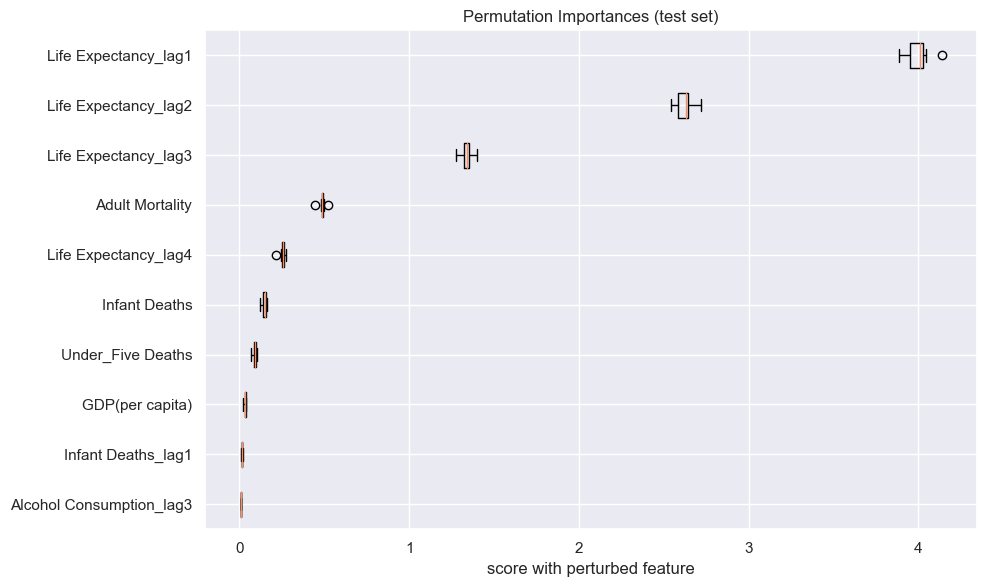

In [114]:
from sklearn.inspection import permutation_importance

#(1) Calculate the feature importance
model = best_models_EN_list[4]
ftr_names = X_test_list[4].columns
result = permutation_importance(model, X_test_list[4], y_test_list[4], scoring='neg_root_mean_squared_error', n_repeats=10, random_state=42)
sorted_indcs = np.argsort(result.importances_mean)[-10:]
top10_ftr_importance = pd.DataFrame(data=result.importances_mean[sorted_indcs][::-1],index=ftr_names[sorted_indcs],columns=['Importance score'])
print(top10_ftr_importance)

# (2) Plot out the top 10 important feature
plt.rcParams.update({'font.size': 11})
plt.figure(figsize=(10,6))
plt.boxplot(result.importances[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.tight_layout()
plt.show()

##### (4) Random Forest - Lag 4 years

In [116]:
best_models_RF_list[3]

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             error_score='raise',
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('ord',
                                                                         OrdinalEncoder(categories=[['Developed',
                                                                                                     'Developing']]),
                                                                         ['Economy '
                                                                          'Status']),
                                                                        ('onehot',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Country',
                                                                          'Region']),
                                                                        ('minmax',...
                                                                          'years)_lag1',
                                                                          'Life '
                                                                          'Expectancy_lag1',
                                                                          'Infant '
                                                                          'Deaths_lag2', ...])])),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=378))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [1, 3, 10, 30, 100,
                                                              None],
                         'randomforestregressor__max_features': [0.5, 0.75, 1.0,
                                                                 None]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=False)

                      Importance score
Measles_lag2                 10.151635
Measles_lag3                  0.740991
Infant Deaths_lag1            0.071720
Infant Deaths                 0.048297
Under_Five Deaths             0.002514
Adult Mortality               0.002395
Life Expectancy_lag4          0.001935
Life Expectancy_lag3          0.001681
Life Expectancy_lag2          0.001379
Life Expectancy_lag1          0.001370


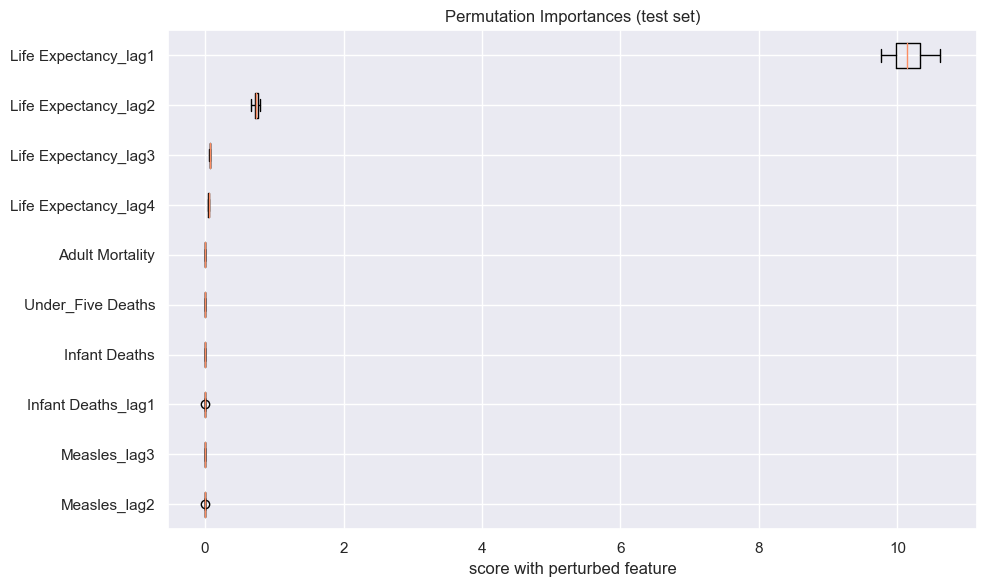

In [117]:
from sklearn.inspection import permutation_importance

#(1) Calculate the feature importance
model = best_models_RF_list[3]
ftr_names = X_test_list[3].columns
result = permutation_importance(model, X_test_list[3], y_test_list[3], scoring='neg_root_mean_squared_error', n_repeats=10, random_state=42)
sorted_indcs = np.argsort(result.importances_mean)[-10:]
top10_ftr_importance = pd.DataFrame(data=result.importances_mean[sorted_indcs][::-1],index=ftr_names[sorted_indcs],columns=['Importance score'])
print(top10_ftr_importance)

# (2) Plot out the top 10 important feature
plt.rcParams.update({'font.size': 11})
plt.figure(figsize=(10,6))
plt.boxplot(result.importances[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.tight_layout()
plt.show()

##### (5) SVM - Lag 3 years

In [118]:
best_models_SVM_list[2]

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             error_score='raise',
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('ord',
                                                                         OrdinalEncoder(categories=[['Developed',
                                                                                                     'Developing']]),
                                                                         ['Economy '
                                                                          'Status']),
                                                                        ('onehot',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Country',
                                                                          'Region']),
                                                                        ('minmax',...
                                                                          'capita)_lag1',
                                                                          'Population_lag1',
                                                                          'Thinness '
                                                                          '(ten '
                                                                          'to '
                                                                          'nineteen '
                                                                          'years)_lag1',
                                                                          'Thinness '
                                                                          '(five '
                                                                          'to '
                                                                          'nine '
                                                                          'years)_lag1',
                                                                          'Life '
                                                                          'Expectancy_lag1',
                                                                          'Infant '
                                                                          'Deaths_lag2', ...])])),
                                       ('svr', SVR())]),
             n_jobs=-1,
             param_grid={'svr__C': [0.1, 1.0, 10.0],
                         'svr__gamma': [0.001, 0.1, 10.0, 1000.0, 100000.0]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=False)

                        Importance score
Adult Mortality_lag2            2.414663
Country                         2.023971
Infant Deaths                   1.692788
Under_Five Deaths_lag1          0.707658
Under_Five Deaths               0.346775
Adult Mortality_lag1            0.217887
Adult Mortality                 0.110040
Life Expectancy_lag3            0.084435
Life Expectancy_lag2            0.082651
Life Expectancy_lag1            0.071011


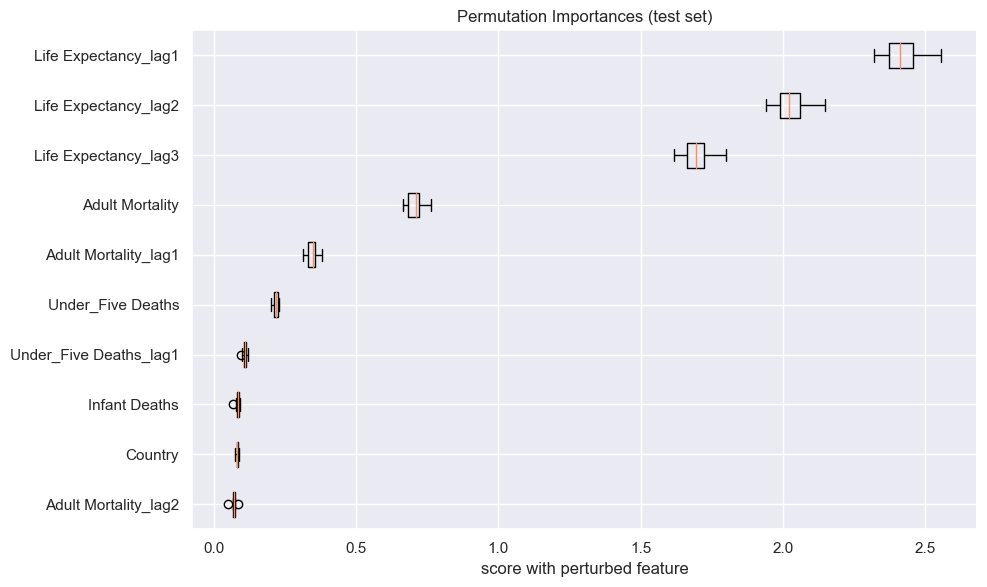

In [119]:
from sklearn.inspection import permutation_importance

#(1) Calculate the feature importance
model = best_models_SVM_list[2]
ftr_names = X_test_list[2].columns
result = permutation_importance(model, X_test_list[2], y_test_list[2], scoring='neg_root_mean_squared_error', n_repeats=10, random_state=42)
sorted_indcs = np.argsort(result.importances_mean)[-10:]
top10_ftr_importance = pd.DataFrame(data=result.importances_mean[sorted_indcs][::-1],index=ftr_names[sorted_indcs],columns=['Importance score'])
print(top10_ftr_importance)

# (2) Plot out the top 10 important feature
plt.rcParams.update({'font.size': 11})
plt.figure(figsize=(10,6))
plt.boxplot(result.importances[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.tight_layout()
plt.show()

##### (6) KNeighnors - Lag 4 years

In [120]:
best_models_KNN_list[3]

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             error_score='raise',
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('ord',
                                                                         OrdinalEncoder(categories=[['Developed',
                                                                                                     'Developing']]),
                                                                         ['Economy '
                                                                          'Status']),
                                                                        ('onehot',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Country',
                                                                          'Region']),
                                                                        ('minmax',...
                                                                          'Population_lag1',
                                                                          'Thinness '
                                                                          '(ten '
                                                                          'to '
                                                                          'nineteen '
                                                                          'years)_lag1',
                                                                          'Thinness '
                                                                          '(five '
                                                                          'to '
                                                                          'nine '
                                                                          'years)_lag1',
                                                                          'Life '
                                                                          'Expectancy_lag1',
                                                                          'Infant '
                                                                          'Deaths_lag2', ...])])),
                                       ('kneighborsregressor',
                                        KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'kneighborsregressor__n_neighbors': [1, 3, 10, 30]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=False)

                          Importance score
Population                        0.111627
Country                           0.093472
Alcohol Consumption_lag4          0.083948
Polio                             0.083764
Measles_lag1                      0.075760
Polio_lag3                        0.070926
Measles                           0.069314
Measles_lag3                      0.068374
Measles_lag2                      0.065966
Measles_lag4                      0.059042


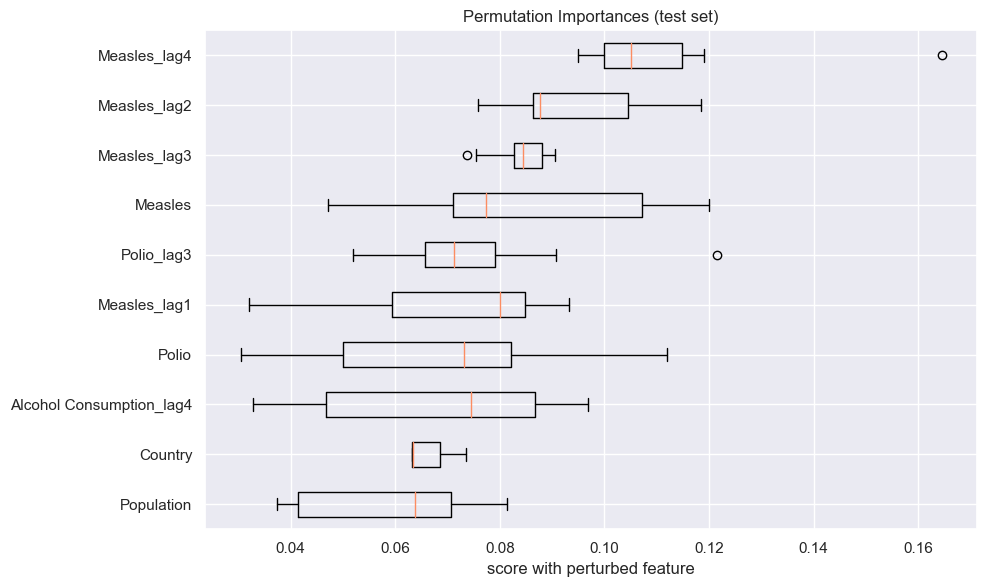

In [121]:
from sklearn.inspection import permutation_importance

#(1) Calculate the feature importance
model = best_models_KNN_list[3]
ftr_names = X_test_list[3].columns
result = permutation_importance(model, X_test_list[3], y_test_list[3], scoring='neg_root_mean_squared_error', n_repeats=10, random_state=42)
sorted_indcs = np.argsort(result.importances_mean)[-10:]
top10_ftr_importance = pd.DataFrame(data=result.importances_mean[sorted_indcs][::-1],index=ftr_names[sorted_indcs],columns=['Importance score'])
print(top10_ftr_importance)

# (2) Plot out the top 10 important feature
plt.rcParams.update({'font.size': 11})
plt.figure(figsize=(10,6))
plt.boxplot(result.importances[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.tight_layout()
plt.show()